# Importamos las librerías

In [2]:
!pip install gdown
!pip install osmnx geopandas shapely rtree fiona pyproj

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.6/507.6 kB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 68.1 MB/s eta 0:00:00


In [3]:
import gdown
import osmnx as ox
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt

# Importamos el dataset desde el repositorio (revisar Readme.md del repo)

In [4]:
url_nodes = "https://media.githubusercontent.com/media/MaxiPis/IIC3641_Proyecto/refs/heads/main/nodes.csv"
nodes = pd.read_csv(url_nodes, sep=',')
#df_nodes.head()


In [5]:
# El dataset de grafos dirigido es este:
#url_edges = "https://media.githubusercontent.com/media/MaxiPis/IIC3641_Proyecto/refs/heads/main/edges_plus.csv"

# El no dirigido es este:
#url_edges = "https://media.githubusercontent.com/media/MaxiPis/IIC3641_Proyecto/refs/heads/main/edges.csv"

# El dirigido pero con velocida agrupada es este
url_edges = "https://media.githubusercontent.com/media/MaxiPis/IIC3641_Proyecto/refs/heads/main/edges_plus_v2.csv"

edges = pd.read_csv(url_edges)
edges.head()

,u,v,Fallecidos,Graves,Menos_Grav,Leves,Ilesos,Tipo_calle_adoquin,Tipo_calle_asfalto,Tipo_calle_concreto,...,Señal_ceda_el_paso,Señal_pare,Calle_recta,Calle_prioridad_peatones,Calle_principal,Calle_residencial,Calle_secundaria,Calle_terciaria,vel_max,Largo_calle_log
0,386140,500862085,0,0,0,0,3,0,1,0,...,0,0,0,0,0,0,0,0,50,0.207750
1,386145,386400,0,0,1,3,11,0,1,0,...,0,0,1,0,1,0,0,0,50,0.492439
2,386157,5420440454,0,0,0,1,7,0,0,1,...,0,0,1,0,0,0,0,1,50,0.394527
3,386225,386416,0,1,0,4,10,0,0,1,...,0,0,1,0,1,0,0,0,40,0.402178
4,386226,6310096608,0,2,0,0,6,0,0,1,...,0,0,1,0,0,0,0,1,50,0.326479


# Sobre la columna del largo de las calles

La gran mayoria de las calles son cortas, sin embargo hay calles que son largas pero escasas (presencia de Hubs) como se puede ver al final de este link: https://github.com/MaxiPis/IIC3641_Proyecto/blob/main/cleaner_final.ipynb

Por lo anterior, se realizó una normalización, permitiendo que el modelo aprendiera representación "continua", pero representativa, entonces en esta nueva "forma" tenemos que, por ejemplo 0.1 y 0.2 no se distancian tanto si "regresamos" al largo de las calles, pero 0.4 de 0.5 esta muy alejado, por tanto estamos hablando de una calle larga.

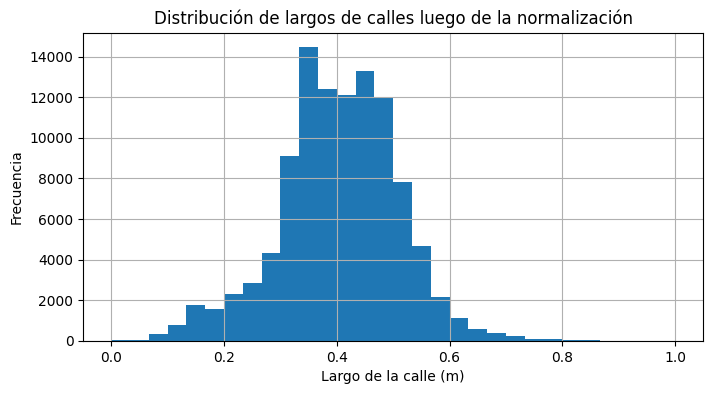

In [ ]:
df = df_edges
# El código de la normalización se encuentra subido en el mismo link adjuntado arriba
col = "Largo_calle_norm"

plt.figure(figsize=(8,4))
plt.hist(df[col], bins=30)
plt.xlabel("Largo de la calle (m)")
plt.ylabel("Frecuencia")
plt.title("Distribución de largos de calles luego de la normalización")
plt.grid(True)
plt.show()

# Ploteo donde las aristas son coloreadas por el tipo de calle/ contruccion de esa calle

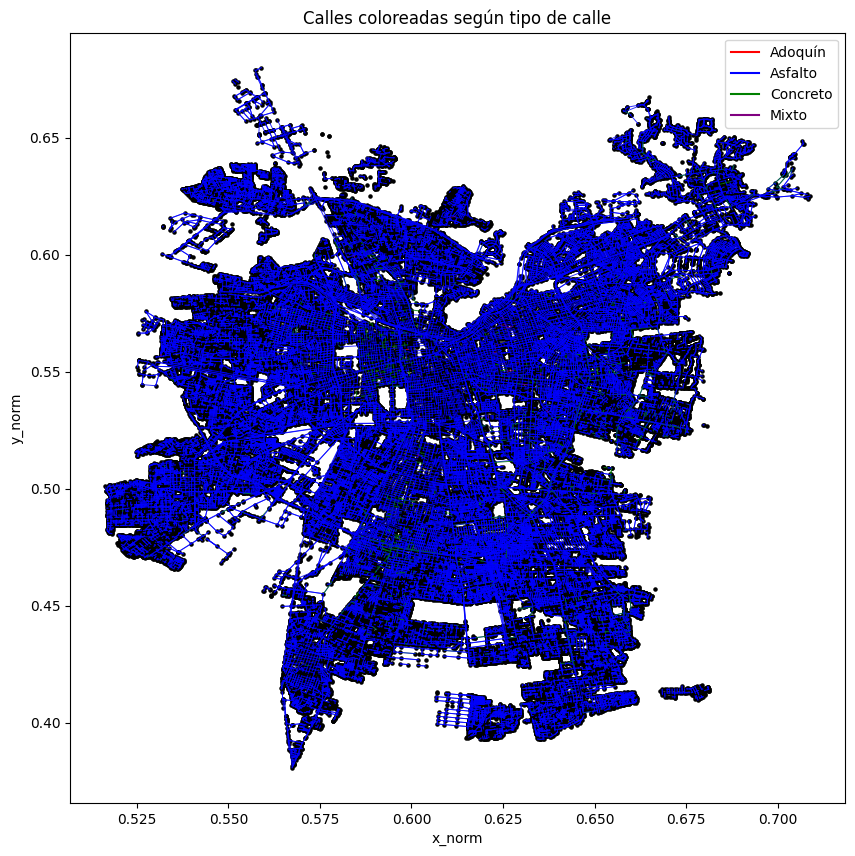

In [ ]:
nodes = df_nodes
edges = df_edges

# Convertir nodes a diccionario para lookup rápido
pos = {row["node"]: (row["x_norm"], row["y_norm"]) for _, row in nodes.iterrows()}

# Función para obtener color según tipo de calle
def get_color(row):
    if row["Tipo_calle_adoquin"] == 1:
        return "red"
    if row["Tipo_calle_asfalto"] == 1:
        return "blue"
    if row["Tipo_calle_concreto"] == 1:
        return "green"
    if row["Tipo_calle_mixto"] == 1:
        return "purple"
    return "gray"  # fallback si no coincide nada

# Crear figura
plt.figure(figsize=(10, 10))

# Dibujar edges
for _, row in edges.iterrows():
    u = row["u"]
    v = row["v"]

    if u not in pos or v not in pos:
        continue

    x1, y1 = pos[u]
    x2, y2 = pos[v]

    color = get_color(row)

    plt.plot([x1, x2], [y1, y2], color=color, linewidth=0.7, alpha=0.8)

# Dibujar nodos
plt.scatter(nodes["x_norm"], nodes["y_norm"], s=5, color="black")

# Leyenda manual
import matplotlib.lines as mlines
legend_items = [
    mlines.Line2D([], [], color="red", label="Adoquín"),
    mlines.Line2D([], [], color="blue", label="Asfalto"),
    mlines.Line2D([], [], color="green", label="Concreto"),
    mlines.Line2D([], [], color="purple", label="Mixto"),
]
plt.legend(handles=legend_items, loc="upper right")

plt.title("Calles coloreadas según tipo de calle")
plt.xlabel("x_norm")
plt.ylabel("y_norm")
plt.grid(False)
plt.show()


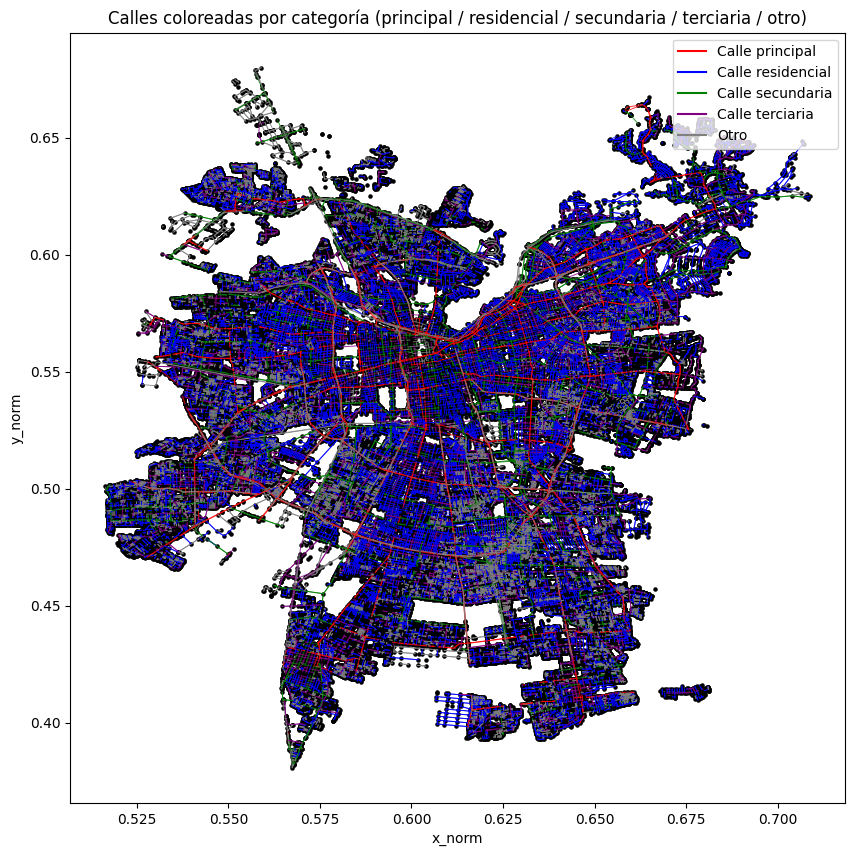

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Diccionario para buscar coordenadas rápido
pos = {row["node"]: (row["x_norm"], row["y_norm"]) for _, row in nodes.iterrows()}

# Función para obtener color según categoría de calle
def get_color(row):
    if row["Calle_principal"] == 1:
        return "red"
    if row["Calle_residencial"] == 1:
        return "blue"
    if row["Calle_secundaria"] == 1:
        return "green"
    if row["Calle_terciaria"] == 1:
        return "purple"
    return "gray"  # Otro

# Crear figura
plt.figure(figsize=(10, 10))

# Dibujar edges
for _, row in edges.iterrows():
    u = row["u"]
    v = row["v"]

    if u not in pos or v not in pos:
        continue

    x1, y1 = pos[u]
    x2, y2 = pos[v]

    color = get_color(row)
    plt.plot([x1, x2], [y1, y2], color=color, linewidth=0.7, alpha=0.8)

# Dibujar nodos
plt.scatter(nodes["x_norm"], nodes["y_norm"], s=5, color="black")

# Leyenda manual
import matplotlib.lines as mlines
legend_items = [
    mlines.Line2D([], [], color="red", label="Calle principal"),
    mlines.Line2D([], [], color="blue", label="Calle residencial"),
    mlines.Line2D([], [], color="green", label="Calle secundaria"),
    mlines.Line2D([], [], color="purple", label="Calle terciaria"),
    mlines.Line2D([], [], color="gray", label="Otro"),
]
plt.legend(handles=legend_items, loc="upper right")

plt.title("Calles coloreadas por categoría (principal / residencial / secundaria / terciaria / otro)")
plt.xlabel("x_norm")
plt.ylabel("y_norm")
plt.grid(False)
plt.show()


# Ejemplo de cómo implementar GraphSAGE

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv

class StreetSafetyModel(nn.Module):
    def __init__(self, node_in_dim, edge_in_dim, hidden_dim, num_classes):
        super(StreetSafetyModel, self).__init__()

        # --- PARTE 1: GraphSAGE (Entendiendo el contexto de los Nodos) ---
        # Entra: [grado, x, y] -> Sale: Embedding latente del nodo
        # Usamos 2 capas para capturar información de los "vecinos de los vecinos"
        self.conv1 = SAGEConv(node_in_dim, hidden_dim)
        self.conv2 = SAGEConv(hidden_dim, hidden_dim)

        # --- PARTE 2: MLP (Predicción de la Arista) ---
        # La entrada de la MLP será:
        # Embedding Nodo Origen (hidden_dim) +
        # Embedding Nodo Destino (hidden_dim) +
        # Features de la Arista (edge_in_dim)
        input_mlp_dim = (hidden_dim * 2) + edge_in_dim

        self.mlp = nn.Sequential(
            nn.Linear(input_mlp_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.2),          # Para evitar overfitting
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, num_classes) # Salida: 3 clases (Bajo, Medio, Alto)
        )

    def forward(self, x, edge_index, edge_attr):
        """
        x: Features de nodos [N, node_in_dim]
        edge_index: Conectividad [2, E]
        edge_attr: Features de aristas [E, edge_in_dim] (Vel, Ciclovia, etc.)
        """

        # 1. Paso los nodos por GraphSAGE para obtener embeddings contextuales (h)
        h = self.conv1(x, edge_index)
        h = F.relu(h)
        h = F.dropout(h, p=0.2, training=self.training)

        h = self.conv2(h, edge_index)
        # h ahora tiene shape [N, hidden_dim]
        # Cada nodo ahora "sabe" dónde está y quiénes son sus vecinos.

        # 2. Construir el vector para clasificar la ARISTA (ij)
        # edge_index[0] son los índices de los nodos origen (i)
        # edge_index[1] son los índices de los nodos destino (j)

        h_source = h[edge_index[0]]  # Embeddings de nodos origen para cada arista
        h_target = h[edge_index[1]]  # Embeddings de nodos destino para cada arista

        # 3. Concatenación: [h_i || h_j || e_{ij}]
        # Shape resultante: [E, hidden_dim + hidden_dim + edge_in_dim]
        edge_representation = torch.cat([h_source, h_target, edge_attr], dim=1)

        # 4. Clasificación final con MLP
        out = self.mlp(edge_representation)

        return out # Retorna Logits (sin softmax, CrossEntropyLoss lo hace internamente)

# ==========================================
# EJEMPLO DE USO CON DATOS FICTICIOS
# ==========================================

# 1. Definir dimensiones del problema
NODE_FEATURES = 3  # [grado, x, y]
EDGE_FEATURES = 4  # [vel_max, direccion, ciclovias, señales]
HIDDEN_DIM = 16    # Tamaño del vector latente
NUM_CLASSES = 3    # [Seguro, Medio, Peligroso]

# 2. Instanciar modelo
model = StreetSafetyModel(NODE_FEATURES, EDGE_FEATURES, HIDDEN_DIM, NUM_CLASSES)
print("Modelo creado:\n", model)

# 3. Crear datos "Dummy" (Simulando tu grafo)
# Imaginemos 5 intersecciones (Nodos) y 6 calles (Aristas)
x = torch.rand((5, NODE_FEATURES))  # 5 nodos con features aleatorias

# Conectividad: 0->1, 1->2, 2->3, 3->4, 4->0, 1->3 (Ejemplo)
edge_index = torch.tensor([
    [0, 1, 2, 3, 4, 1],
    [1, 2, 3, 4, 0, 3]
], dtype=torch.long)

# Features de las 6 calles
edge_attr = torch.rand((6, EDGE_FEATURES))

# Target real (lo que usarías para entrenar): 0, 1 o 2
y_true = torch.tensor([0, 0, 2, 1, 0, 2], dtype=torch.long)

# 4. Forward Pass (Predicción)
logits = model(x, edge_index, edge_attr)

# 5. Calcular Probabilidades y Clase
probs = F.softmax(logits, dim=1)
pred_clase = probs.argmax(dim=1)

print("\n--- Resultados del Forward Pass ---")
print(f"Logits shape: {logits.shape} (Debe ser [6 aristas, 3 clases])")
print(f"Probabilidades (primera calle): {probs[0].detach().numpy()}")
print(f"Clase Predicha (todas): {pred_clase.numpy()}")

# 6. Ejemplo de cálculo de Error (Loss)
criterion = nn.CrossEntropyLoss() # Útil si tienes desbalance, puedes agregar 'weight=...'
loss = criterion(logits, y_true)
print(f"Loss del batch: {loss.item()}")

# Ejemplo de cómo usar GNNExplainer + GraphSAGE

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv, GNNExplainer

# 1. Definir modelo GraphSAGE
class GraphSAGE(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

# 2. Crear modelo
model = GraphSAGE(
    in_channels=data.x.size(1),
    hidden_channels=64,
    out_channels=num_classes
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 3. Entrenar modelo GraphSAGE
for epoch in range(200):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.cross_entropy(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

# 4. Crear el explicador
explainer = GNNExplainer(model, epochs=200)

# 5. Elegir un nodo que quieras explicar
node_id = 10  # por ejemplo

# 6. Obtener la explicación
node_feat_mask, edge_mask = explainer.explain_node(
    node_id,
    data.x,
    data.edge_index
)

# 7. Visualización del subgrafo más relevante
explainer.visualize_subgraph(
    node_id=node_id,
    edge_index=data.edge_index,
    edge_mask=edge_mask
)


# Preguntandole a los datos

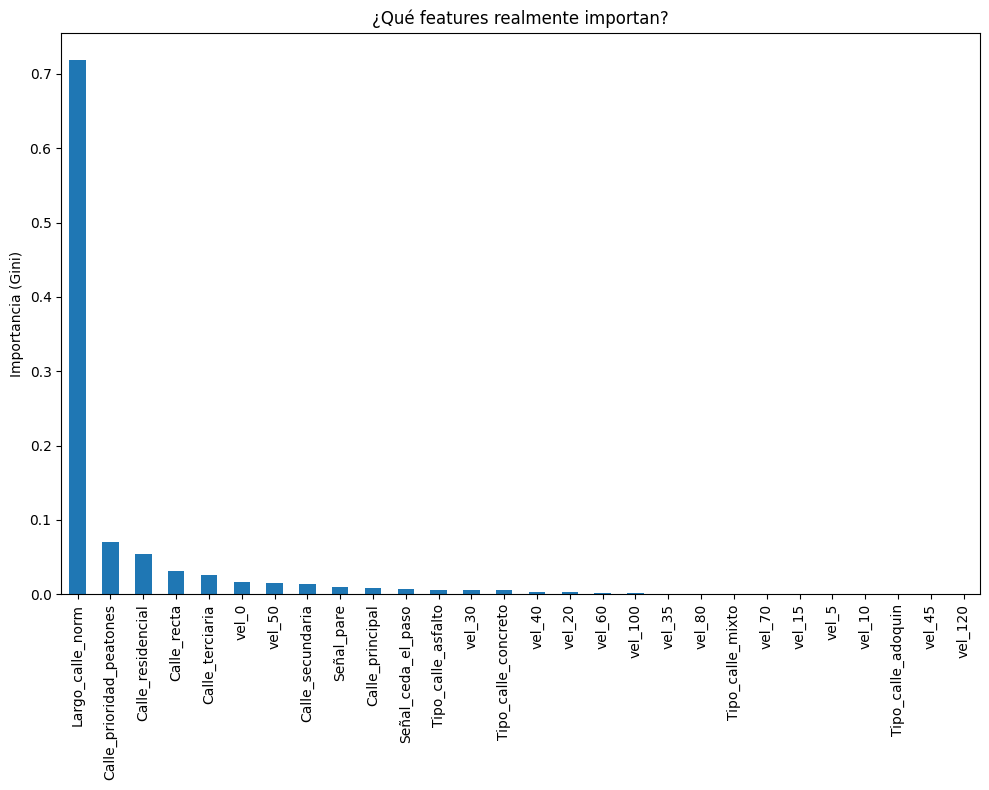

In [57]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
node_feature_cols = ["x_norm", "y_norm", "street_count"]

# Mapeo id OSM → índice interno 0..N-1
unique_nodes = sorted(nodes["node"].unique())
node_id_to_idx = {nid: idx for idx, nid in enumerate(unique_nodes)}

nodes_sorted = nodes.set_index("node").loc[unique_nodes].reset_index()

x = torch.tensor(
    nodes_sorted[node_feature_cols].values,
    dtype=torch.float32
)

# ============================
# 2. Ordenar aristas y crear etiqueta de riesgo
# ============================
edges_sorted = edges.sort_values(by=["u", "v"]).reset_index(drop=True)

# 1. Prepara tus datos tabulares (solo aristas)
# Usa las mismas columnas que usas en edge_attr
X_feat = edges_sorted[edge_feature_cols].fillna(0)
y_target = edges_sorted["risk_level"] # Tu target binario o de 3 clases

# 2. Entrena un modelo rápido
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_feat, y_target)

# 3. Extraer importancia
importances = rf.feature_importances_
feature_names = edge_feature_cols

# Crear DataFrame para visualizar
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# 4. Graficar
plt.figure(figsize=(10, 8))
forest_importances.plot.bar()
plt.title("¿Qué features realmente importan?")
plt.ylabel("Importancia (Gini)")
plt.tight_layout()
plt.show()

# Implementar modelo definitivo

imports

In [3]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip install pyg-lib torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.4.0+cu121.html


Looking in indexes: https://download.pytorch.org/whl/cu121
Looking in links: https://data.pyg.org/whl/torch-2.4.0+cu121.html


In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch_geometric.data import Data
from torch_geometric.nn import SAGEConv
from torch_geometric.explain import Explainer, GNNExplainer

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import numpy as np
import random

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device


device(type='cuda')

Preparar tensores, crear risk_level y armar Data

In [39]:
import pandas as pd

# ============================
# 1. Features de nodo (nodes.csv)
# ============================
# Tus columnas reales:
# ['node', 'x_norm', 'y_norm', 'street_count']
node_feature_cols = ["x_norm", "y_norm", "street_count"]

# Mapeo id OSM → índice interno 0..N-1
unique_nodes = sorted(nodes["node"].unique())
node_id_to_idx = {nid: idx for idx, nid in enumerate(unique_nodes)}

nodes_sorted = nodes.set_index("node").loc[unique_nodes].reset_index()

x = torch.tensor(
    nodes_sorted[node_feature_cols].values,
    dtype=torch.float32
)

# ============================
# 2. Ordenar aristas y crear etiqueta de riesgo
# ============================
edges_sorted = edges.sort_values(by=["u", "v"]).reset_index(drop=True)

# Target original (accidentes)
target_cols = ["Fallecidos", "Graves", "Menos_Grav", "Leves", "Ilesos"]

# Severidad "proxy" (puedes ajustar pesos)
edges_sorted["severity_score"] = (
    3 * edges_sorted["Fallecidos"] +
    2 * edges_sorted["Graves"] +
    1 * edges_sorted["Menos_Grav"] +
    0.5 * edges_sorted["Leves"]
)

# Severidad por longitud de calle normalizada
edges_sorted["severity_per_length"] = edges_sorted["severity_score"] / (edges_sorted["Largo_calle_norm"] + 1e-6)

# Clases de riesgo (0: bajo, 1: medio, 2: alto) usando terciles
edges_sorted["risk_level"] = pd.qcut(
    edges_sorted["severity_per_length"].rank(method="first"),
    q=3,
    labels=[0, 1, 2]
).astype(int)

label_col = "risk_level"

# ============================
# 3. edge_index (u,v → índices internos)
# ============================
u_idx = edges_sorted["u"].map(node_id_to_idx).values
v_idx = edges_sorted["v"].map(node_id_to_idx).values

edge_index = torch.tensor(
    np.vstack([u_idx, v_idx]),
    dtype=torch.long
)

# ============================
# 4. Features de arista (edge_attr)
#    NO usamos las columnas del target para evitar leakage
# ============================

edge_feature_cols = [
    # tipo de calle
    "Tipo_calle_adoquin",
    "Tipo_calle_asfalto",
    "Tipo_calle_concreto",
    "Tipo_calle_mixto",
    # dirección y señalización
    #"direccion_calle",                                             # LO QUITAMOS CUANDO TRABAJAMOS CON EDGES_PLUS.CSV
    "Señal_ceda_el_paso",
    "Señal_pare",
    # info geométrica / funcional
    "Calle_recta",
    "Calle_prioridad_peatones",
    "Calle_principal",
    "Calle_residencial",
    "Calle_secundaria",
    "Calle_terciaria",
    # velocidades (one-hot)
    "vel_0", "vel_5", "vel_10", "vel_15", "vel_20",
    "vel_30", "vel_35", "vel_40", "vel_45", "vel_50",
    "vel_60", "vel_70", "vel_80", "vel_100", "vel_120",
    # largo normalizado
    "Largo_calle_norm"
]

edge_attr = torch.tensor(
    edges_sorted[edge_feature_cols].values,
    dtype=torch.float32
)

# ============================
# 5. Etiquetas por arista
# ============================

y_edge = torch.tensor(
    edges_sorted[label_col].values,
    dtype=torch.long
)

num_nodes = x.size(0)
num_edges = edge_index.size(1)
num_node_features = x.size(1)
num_edge_features = edge_attr.size(1)
num_classes = int(y_edge.max().item() + 1)

print(f"# nodos: {num_nodes}")
print(f"# aristas: {num_edges}")
print(f"# features nodo: {num_node_features}")
print(f"# features arista: {num_edge_features}")
print(f"# clases: {num_classes}")

# ============================
# 6. Split train/val/test a nivel arista
# ============================

def train_val_test_split(num_items, train_ratio=0.7, val_ratio=0.15, seed=42):
    random.seed(seed)
    idx = list(range(num_items))
    random.shuffle(idx)

    n_train = int(train_ratio * num_items)
    n_val = int(val_ratio * num_items)
    n_test = num_items - n_train - n_val

    train_idx = idx[:n_train]
    val_idx = idx[n_train:n_train+n_val]
    test_idx = idx[n_train+n_val:]

    mask_train = torch.zeros(num_items, dtype=torch.bool)
    mask_val = torch.zeros(num_items, dtype=torch.bool)
    mask_test = torch.zeros(num_items, dtype=torch.bool)

    mask_train[train_idx] = True
    mask_val[val_idx] = True
    mask_test[test_idx] = True

    return mask_train, mask_val, mask_test

train_mask, val_mask, test_mask = train_val_test_split(num_edges)

# ============================
# 7. Crear objeto Data de PyG y pasar a device
# ============================

data = Data(
    x=x,
    edge_index=edge_index,
    edge_attr=edge_attr
)

data.y_edge = y_edge
data.train_mask = train_mask
data.val_mask = val_mask
data.test_mask = test_mask

data = data.to(device)

num_node_features = data.x.size(1)
num_edge_features = data.edge_attr.size(1)

data


# nodos: 102568
# aristas: 206594
# features nodo: 3
# features arista: 28
# clases: 3


Data(x=[102568, 3], edge_index=[2, 206594], edge_attr=[206594, 28], y_edge=[206594], train_mask=[206594], val_mask=[206594], test_mask=[206594])

Modelo GraphSAGE para clasificación de aristas

In [40]:
class StreetSafetyModel(nn.Module):
    """
    GraphSAGE sobre nodos + MLP sobre aristas.
    Predice clase de riesgo por arista.
    """
    def __init__(
        self,
        node_in_dim,
        edge_in_dim,
        hidden_dim,
        num_classes,
        num_layers=2,
        dropout=0.3
    ):
        super().__init__()

        self.num_layers = num_layers
        self.dropout = dropout

        # --- GraphSAGE en nodos ---
        self.convs = nn.ModuleList()
        self.convs.append(SAGEConv(node_in_dim, hidden_dim))
        for _ in range(num_layers - 1):
            self.convs.append(SAGEConv(hidden_dim, hidden_dim))

        # --- MLP en aristas ---
        edge_input_dim = 2 * hidden_dim + edge_in_dim

        self.mlp = nn.Sequential(
            nn.Linear(edge_input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, num_classes)
        )

    def forward(self, x, edge_index, edge_attr):
        # 1) Embeddings de nodos
        h = x
        for conv in self.convs:
            h = conv(h, edge_index)
            h = F.relu(h)
            h = F.dropout(h, p=self.dropout, training=self.training)

        # 2) Representación de aristas
        src, dst = edge_index  # [num_edges]
        h_src = h[src]
        h_dst = h[dst]

        edge_rep = torch.cat([h_src, h_dst, edge_attr], dim=1)

        # 3) Logits por arista
        out = self.mlp(edge_rep)
        return out  # [num_edges, num_classes]


Instanciar modelo, optimizador y loss

In [41]:
hidden_dim = 64
num_layers = 2
dropout = 0.3
learning_rate = 1e-3
weight_decay = 1e-4

model = StreetSafetyModel(
    node_in_dim=num_node_features,
    edge_in_dim=num_edge_features,
    hidden_dim=hidden_dim,
    num_classes=num_classes,
    num_layers=num_layers,
    dropout=dropout
).to(device)

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=learning_rate,
    weight_decay=weight_decay
)

criterion = nn.CrossEntropyLoss()

model


StreetSafetyModel(
  (convs): ModuleList(
    (0): SAGEConv(3, 64, aggr=mean)
    (1): SAGEConv(64, 64, aggr=mean)
  )
  (mlp): Sequential(
    (0): Linear(in_features=156, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=64, out_features=3, bias=True)
  )
)

Funciones de entrenamiento y validación

In [42]:
def train_one_epoch(data, model, optimizer, criterion):
    model.train()
    optimizer.zero_grad()

    logits = model(data.x, data.edge_index, data.edge_attr)  # [E, C]
    loss = criterion(
        logits[data.train_mask],
        data.y_edge[data.train_mask]
    )

    loss.backward()
    optimizer.step()

    with torch.no_grad():
        preds = logits.argmax(dim=1)
        train_acc = accuracy_score(
            data.y_edge[data.train_mask].cpu(),
            preds[data.train_mask].cpu()
        )

    return loss.item(), train_acc


@torch.no_grad()
def evaluate(data, model, criterion, split="val"):
    model.eval()
    logits = model(data.x, data.edge_index, data.edge_attr)
    y_true = data.y_edge

    if split == "val":
        mask = data.val_mask
    elif split == "test":
        mask = data.test_mask
    elif split == "train":
        mask = data.train_mask
    else:
        raise ValueError("split debe ser 'train', 'val' o 'test'.")

    loss = criterion(
        logits[mask],
        y_true[mask]
    ).item()

    preds = logits.argmax(dim=1)

    acc = accuracy_score(
        y_true[mask].cpu(),
        preds[mask].cpu()
    )
    f1_macro = f1_score(
        y_true[mask].cpu(),
        preds[mask].cpu(),
        average="macro"
    )

    return loss, acc, f1_macro


Entrenamiento del modelo

In [43]:
num_epochs = 1500

best_val_f1 = 0.0
best_state_dict = None
list_losses = []
list_accs = []
for epoch in range(1, num_epochs + 1):
    train_loss, train_acc = train_one_epoch(data, model, optimizer, criterion)
    val_loss, val_acc, val_f1 = evaluate(data, model, criterion, split="val")

    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        best_state_dict = {k: v.cpu().clone() for k, v in model.state_dict().items()}

    if epoch % 5 == 0 or epoch == 1:
        print(
            f"Epoch {epoch:03d} | "
            f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.3f} | "
            f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.3f} | Val F1: {val_f1:.3f}"
        )
    list_losses.append(train_loss)
    list_accs.append(train_acc)

if best_state_dict is not None:
    model.load_state_dict(best_state_dict)
    model.to(device)
    print(f"\nMejor F1 de validación: {best_val_f1:.4f}")


Epoch 001 | Train Loss: 1.1534 | Train Acc: 0.335 | Val Loss: 1.1148 | Val Acc: 0.329 | Val F1: 0.165
Epoch 005 | Train Loss: 1.1046 | Train Acc: 0.342 | Val Loss: 1.0963 | Val Acc: 0.337 | Val F1: 0.176
Epoch 010 | Train Loss: 1.0985 | Train Acc: 0.346 | Val Loss: 1.0937 | Val Acc: 0.350 | Val F1: 0.274
Epoch 015 | Train Loss: 1.0928 | Train Acc: 0.371 | Val Loss: 1.0899 | Val Acc: 0.369 | Val F1: 0.250
Epoch 020 | Train Loss: 1.0900 | Train Acc: 0.383 | Val Loss: 1.0859 | Val Acc: 0.401 | Val F1: 0.305
Epoch 025 | Train Loss: 1.0858 | Train Acc: 0.390 | Val Loss: 1.0820 | Val Acc: 0.379 | Val F1: 0.275
Epoch 030 | Train Loss: 1.0804 | Train Acc: 0.395 | Val Loss: 1.0752 | Val Acc: 0.395 | Val F1: 0.323
Epoch 035 | Train Loss: 1.0746 | Train Acc: 0.402 | Val Loss: 1.0697 | Val Acc: 0.384 | Val F1: 0.293
Epoch 040 | Train Loss: 1.0701 | Train Acc: 0.407 | Val Loss: 1.0659 | Val Acc: 0.388 | Val F1: 0.294
Epoch 045 | Train Loss: 1.0654 | Train Acc: 0.415 | Val Loss: 1.0605 | Val Acc: 0.

Evaluación final en test

In [44]:
@torch.no_grad()
def evaluate_full_metrics(data, model, split="test"):
    model.eval()
    logits = model(data.x, data.edge_index, data.edge_attr)
    y_true = data.y_edge

    if split == "val":
        mask = data.val_mask
    elif split == "test":
        mask = data.test_mask
    elif split == "train":
        mask = data.train_mask
    else:
        raise ValueError("split debe ser 'train', 'val' o 'test'.")

    y_true_split = y_true[mask].cpu()
    y_pred_split = logits[mask].argmax(dim=1).cpu()

    acc = accuracy_score(y_true_split, y_pred_split)
    f1_macro = f1_score(y_true_split, y_pred_split, average="macro")
    f1_weighted = f1_score(y_true_split, y_pred_split, average="weighted")
    cm = confusion_matrix(y_true_split, y_pred_split)

    print(f"{split.upper()} accuracy:  {acc:.4f}")
    print(f"{split.upper()} F1 macro: {f1_macro:.4f}")
    print(f"{split.upper()} F1 weighted: {f1_weighted:.4f}")
    print("\nReporte de clasificación:")
    print(classification_report(y_true_split, y_pred_split))
    print("Matriz de confusión:")
    print(cm)

    return {
        "acc": acc,
        "f1_macro": f1_macro,
        "f1_weighted": f1_weighted,
        "cm": cm
    }

test_metrics = evaluate_full_metrics(data, model, split="test")


TEST accuracy:  0.6149
TEST F1 macro: 0.6092
TEST F1 weighted: 0.6091

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.64      0.77      0.70     10335
           1       0.58      0.59      0.59     10221
           2       0.62      0.48      0.54     10434

    accuracy                           0.61     30990
   macro avg       0.61      0.62      0.61     30990
weighted avg       0.61      0.61      0.61     30990

Matriz de confusión:
[[8002 1310 1023]
 [2103 6063 2055]
 [2431 3013 4990]]


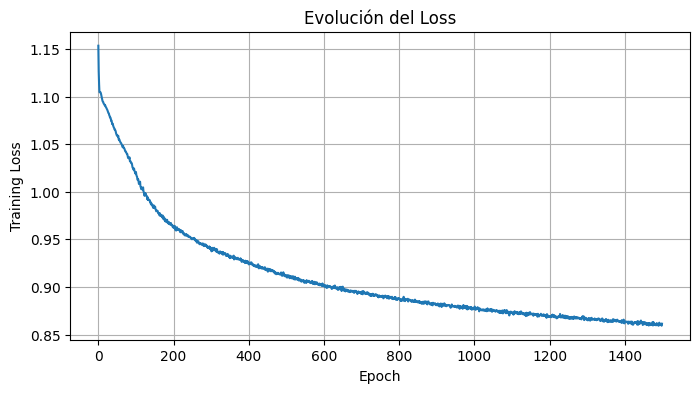

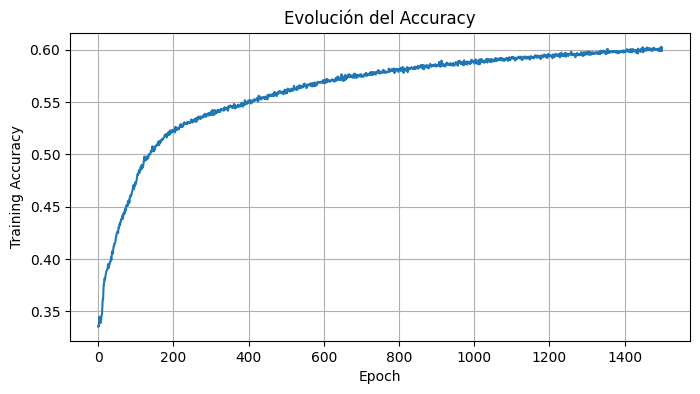

In [45]:
import matplotlib.pyplot as plt

# Plot de la pérdida
plt.figure(figsize=(8, 4))
plt.plot(list_losses)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Evolución del Loss")
plt.grid(True)
plt.show()

# Plot de la accuracy
plt.figure(figsize=(8, 4))
plt.plot(list_accs)
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")
plt.title("Evolución del Accuracy")
plt.grid(True)
plt.show()


GNNExplainer para explicar una arista

In [ ]:
from torch_geometric.explain import Explainer, GNNExplainer

# Configuramos el explainer para un modelo de clasificación multiclase a nivel de arista
explainer = Explainer(
    model=model,
    algorithm=GNNExplainer(epochs=200),
    explanation_type="model",
    node_mask_type="attributes",
    edge_mask_type="object",
    model_config=dict(
        mode="multiclass_classification",
        task_level="edge",
        return_type="raw",   # nuestro modelo entrega logits (no softmax)
    ),
)

# Elegimos una arista del split de test para explicar
edge_id = int(torch.nonzero(data.test_mask)[0].item())
print("Explicando arista (edge_id):", edge_id)

# edge_index y edge_attr van como keyword arguments
explanation = explainer(
    data.x,
    edge_index=data.edge_index,
    edge_attr=data.edge_attr,
    index=edge_id,
)

# Máscaras de importancia
edge_mask = explanation.edge_mask      # importancia por arista
node_mask = explanation.node_mask      # importancia de features de nodo

print("Dim edge_mask:", edge_mask.shape)
print("Dim node_mask:", node_mask.shape)

explanation.visualize_graph()


Explicando arista (edge_id): 4
Dim edge_mask: torch.Size([104489])
Dim node_mask: torch.Size([102568, 3])


# Probando con GAT

Preparación de los datos igual que antes

In [30]:
import pandas as pd

# ============================
# 1. Features de nodo (nodes.csv)
# ============================
# Tus columnas reales:
# ['node', 'x_norm', 'y_norm', 'street_count']
node_feature_cols = ["x_norm", "y_norm", "street_count"]

# Mapeo id OSM → índice interno 0..N-1
unique_nodes = sorted(nodes["node"].unique())
node_id_to_idx = {nid: idx for idx, nid in enumerate(unique_nodes)}

nodes_sorted = nodes.set_index("node").loc[unique_nodes].reset_index()

x = torch.tensor(
    nodes_sorted[node_feature_cols].values,
    dtype=torch.float32
)

# ============================
# 2. Ordenar aristas y crear etiqueta de riesgo
# ============================
edges_sorted = edges.sort_values(by=["u", "v"]).reset_index(drop=True)

# Target original (accidentes)
target_cols = ["Fallecidos", "Graves", "Menos_Grav", "Leves", "Ilesos"]

# Severidad "proxy" (puedes ajustar pesos)
edges_sorted["severity_score"] = (
    3 * edges_sorted["Fallecidos"] +
    2 * edges_sorted["Graves"] +
    1 * edges_sorted["Menos_Grav"] +
    0.5 * edges_sorted["Leves"]
)

# Severidad por longitud de calle normalizada
edges_sorted["severity_per_length"] = edges_sorted["severity_score"] / (edges_sorted["Largo_calle_norm"] + 1e-6)

# Clases de riesgo (0: bajo, 1: medio, 2: alto) usando terciles
edges_sorted["risk_level"] = pd.qcut(
    edges_sorted["severity_per_length"].rank(method="first"),
    q=3,
    labels=[0, 1, 2]
).astype(int)

label_col = "risk_level"

# ============================
# 3. edge_index (u,v → índices internos)
# ============================
u_idx = edges_sorted["u"].map(node_id_to_idx).values
v_idx = edges_sorted["v"].map(node_id_to_idx).values

edge_index = torch.tensor(
    np.vstack([u_idx, v_idx]),
    dtype=torch.long
)

# ============================
# 4. Features de arista (edge_attr)
#    NO usamos las columnas del target para evitar leakage
# ============================

edge_feature_cols = [
    # tipo de calle
    "Tipo_calle_adoquin",
    "Tipo_calle_asfalto",
    "Tipo_calle_concreto",
    "Tipo_calle_mixto",
    # dirección y señalización
    #"direccion_calle",                                         # CON EDGES_PLUS NO CONSIDERAMOS LA DIRECCIÓN
    "Señal_ceda_el_paso",
    "Señal_pare",
    # info geométrica / funcional
    "Calle_recta",
    "Calle_prioridad_peatones",
    "Calle_principal",
    "Calle_residencial",
    "Calle_secundaria",
    "Calle_terciaria",
    # velocidades (one-hot)
    "vel_0", "vel_5", "vel_10", "vel_15", "vel_20",
    "vel_30", "vel_35", "vel_40", "vel_45", "vel_50",
    "vel_60", "vel_70", "vel_80", "vel_100", "vel_120",
    # largo normalizado
    "Largo_calle_norm"
]

edge_attr = torch.tensor(
    edges_sorted[edge_feature_cols].values,
    dtype=torch.float32
)

# ============================
# 5. Etiquetas por arista
# ============================

y_edge = torch.tensor(
    edges_sorted[label_col].values,
    dtype=torch.long
)

num_nodes = x.size(0)
num_edges = edge_index.size(1)
num_node_features = x.size(1)
num_edge_features = edge_attr.size(1)
num_classes = int(y_edge.max().item() + 1)

print(f"# nodos: {num_nodes}")
print(f"# aristas: {num_edges}")
print(f"# features nodo: {num_node_features}")
print(f"# features arista: {num_edge_features}")
print(f"# clases: {num_classes}")

# ============================
# 6. Split train/val/test a nivel arista
# ============================

def train_val_test_split(num_items, train_ratio=0.7, val_ratio=0.15, seed=42):
    random.seed(seed)
    idx = list(range(num_items))
    random.shuffle(idx)

    n_train = int(train_ratio * num_items)
    n_val = int(val_ratio * num_items)
    n_test = num_items - n_train - n_val

    train_idx = idx[:n_train]
    val_idx = idx[n_train:n_train+n_val]
    test_idx = idx[n_train+n_val:]

    mask_train = torch.zeros(num_items, dtype=torch.bool)
    mask_val = torch.zeros(num_items, dtype=torch.bool)
    mask_test = torch.zeros(num_items, dtype=torch.bool)

    mask_train[train_idx] = True
    mask_val[val_idx] = True
    mask_test[test_idx] = True

    return mask_train, mask_val, mask_test

train_mask, val_mask, test_mask = train_val_test_split(num_edges)

# ============================
# 7. Crear objeto Data de PyG y pasar a device
# ============================

data = Data(
    x=x,
    edge_index=edge_index,
    edge_attr=edge_attr
)

data.y_edge = y_edge
data.train_mask = train_mask
data.val_mask = val_mask
data.test_mask = test_mask

data = data.to(device)

num_node_features = data.x.size(1)
num_edge_features = data.edge_attr.size(1)

data


# nodos: 102568
# aristas: 206594
# features nodo: 3
# features arista: 28
# clases: 3


Data(x=[102568, 3], edge_index=[2, 206594], edge_attr=[206594, 28], y_edge=[206594], train_mask=[206594], val_mask=[206594], test_mask=[206594])

Aqui viene el cambio, ahora entrenamos usando GAT

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv, Linear

class StreetSafetyModelGAT(nn.Module):
    """
    GAT (con features de arista integrados) sobre nodos + MLP sobre aristas.
    Predice clase de riesgo por arista.
    """
    def __init__(
        self,
        node_in_dim,
        edge_in_dim,
        hidden_dim,
        num_classes,
        num_layers=2,
        dropout=0.3,
        heads=4  # Nuevo: Número de cabezas de atención
    ):
        super().__init__()

        self.num_layers = num_layers
        self.dropout = dropout

        self.convs = nn.ModuleList()

        # --- Capa 1: GAT ---
        # concat=True: la salida será hidden_dim * heads
        # IMPORTANTE: edge_dim permite que GAT use tus features de calle para calcular la atención
        self.convs.append(
            GATConv(node_in_dim, hidden_dim, heads=heads, dropout=dropout, edge_dim=edge_in_dim, concat=True)
        )

        # --- Capas intermedias (si usas más de 2 capas) ---
        # La entrada es (hidden_dim * heads) de la capa anterior
        for _ in range(num_layers - 2):
             self.convs.append(
                GATConv(hidden_dim * heads, hidden_dim, heads=heads, dropout=dropout, edge_dim=edge_in_dim, concat=True)
            )

        # --- Capa final de nodos ---
        # concat=False: promediamos las cabezas para volver a tener un embedding de tamaño 'hidden_dim'
        self.convs.append(
            GATConv(hidden_dim * heads, hidden_dim, heads=1, dropout=dropout, edge_dim=edge_in_dim, concat=False)
        )

        # --- MLP en aristas (Igual que antes) ---
        # Toma embedding del nodo U + embedding nodo V + features originales de la arista
        edge_input_dim = 2 * hidden_dim + edge_in_dim

        self.mlp = nn.Sequential(
            nn.Linear(edge_input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, num_classes)
        )

    def forward(self, x, edge_index, edge_attr):
        # 1) Embeddings de nodos con Atención
        h = x
        for i, conv in enumerate(self.convs):
            # ¡Aquí está la magia! Pasamos edge_attr a la convolución
            h = conv(h, edge_index, edge_attr=edge_attr)

            # Usualmente GAT usa ELU en lugar de ReLU entre capas
            if i < len(self.convs) - 1:
                h = F.elu(h)
                h = F.dropout(h, p=self.dropout, training=self.training)

        # 2) Representación de aristas para el clasificador final
        src, dst = edge_index  # [num_edges]
        h_src = h[src]
        h_dst = h[dst]

        # Concatenamos: [Embedding Nodo Origen, Embedding Nodo Destino, Features Arista Originales]
        edge_rep = torch.cat([h_src, h_dst, edge_attr], dim=1)

        # 3) Logits por arista
        out = self.mlp(edge_rep)
        return out  # [num_edges, num_classes]

In [32]:
# ============================
# Hiperparámetros ajustados para GAT
# ============================
# GAT se beneficia de embeddings un poco más grandes y multiple heads
hidden_dim = 128   # Aumentado de 64 a 128
heads = 4          # Estándar para empezar
num_layers = 2     # Mantenemos 2 capas (1 de entrada con 4 cabezas -> 1 de salida que promedia)
dropout = 0.4      # Un poco más de dropout para evitar overfitting con GAT
learning_rate = 0.0005 # Un poco más bajo para estabilidad al inicio
weight_decay = 5e-4    # Un poco más de regularización

# Limpiar memoria de GPU por si acaso
torch.cuda.empty_cache()
model = None

model = StreetSafetyModelGAT(
    node_in_dim=num_node_features,
    edge_in_dim=num_edge_features,
    hidden_dim=hidden_dim,
    num_classes=num_classes,
    num_layers=num_layers,
    dropout=dropout,
    heads=heads
).to(device)

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=learning_rate,
    weight_decay=weight_decay
)

# Opcional: Usar Class Weights si tus clases 0, 1, 2 siguen desbalanceadas
# class_weights = torch.tensor([1.0, 1.5, 2.0]).to(device)
# criterion = nn.CrossEntropyLoss(weight=class_weights)
criterion = nn.CrossEntropyLoss()

print(model)
# Ahora ejecuta tus celdas de entrenamiento (train_one_epoch y el bucle principal) exactamente igual que antes.

StreetSafetyModelGAT(
  (convs): ModuleList(
    (0): GATConv(3, 128, heads=4)
    (1): GATConv(512, 128, heads=1)
  )
  (mlp): Sequential(
    (0): Linear(in_features=284, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=128, out_features=3, bias=True)
  )
)


In [33]:
def train_one_epoch(data, model, optimizer, criterion):
    model.train()
    optimizer.zero_grad()

    logits = model(data.x, data.edge_index, data.edge_attr)  # [E, C]
    loss = criterion(
        logits[data.train_mask],
        data.y_edge[data.train_mask]
    )

    loss.backward()
    optimizer.step()

    with torch.no_grad():
        preds = logits.argmax(dim=1)
        train_acc = accuracy_score(
            data.y_edge[data.train_mask].cpu(),
            preds[data.train_mask].cpu()
        )

    return loss.item(), train_acc


@torch.no_grad()
def evaluate(data, model, criterion, split="val"):
    model.eval()
    logits = model(data.x, data.edge_index, data.edge_attr)
    y_true = data.y_edge

    if split == "val":
        mask = data.val_mask
    elif split == "test":
        mask = data.test_mask
    elif split == "train":
        mask = data.train_mask
    else:
        raise ValueError("split debe ser 'train', 'val' o 'test'.")

    loss = criterion(
        logits[mask],
        y_true[mask]
    ).item()

    preds = logits.argmax(dim=1)

    acc = accuracy_score(
        y_true[mask].cpu(),
        preds[mask].cpu()
    )
    f1_macro = f1_score(
        y_true[mask].cpu(),
        preds[mask].cpu(),
        average="macro"
    )

    return loss, acc, f1_macro


In [35]:
num_epochs = 1500

best_val_f1 = 0.0
best_state_dict = None
list_loss = []
list_accu = []
for epoch in range(1, num_epochs + 1):
    train_loss, train_acc = train_one_epoch(data, model, optimizer, criterion)
    val_loss, val_acc, val_f1 = evaluate(data, model, criterion, split="val")

    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        best_state_dict = {k: v.cpu().clone() for k, v in model.state_dict().items()}

    if epoch % 5 == 0 or epoch == 1:
        print(
            f"Epoch {epoch:03d} | "
            f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.3f} | "
            f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.3f} | Val F1: {val_f1:.3f}"
        )
    list_loss.append(train_loss)
    list_accu.append(train_acc)

if best_state_dict is not None:
    model.load_state_dict(best_state_dict)
    model.to(device)
    print(f"\nMejor F1 de validación: {best_val_f1:.4f}")


Epoch 001 | Train Loss: 1.0035 | Train Acc: 0.493 | Val Loss: 0.9870 | Val Acc: 0.508 | Val F1: 0.493
Epoch 005 | Train Loss: 1.0028 | Train Acc: 0.497 | Val Loss: 0.9861 | Val Acc: 0.508 | Val F1: 0.493
Epoch 010 | Train Loss: 1.0006 | Train Acc: 0.497 | Val Loss: 0.9852 | Val Acc: 0.509 | Val F1: 0.492
Epoch 015 | Train Loss: 0.9986 | Train Acc: 0.497 | Val Loss: 0.9828 | Val Acc: 0.512 | Val F1: 0.499
Epoch 020 | Train Loss: 0.9982 | Train Acc: 0.498 | Val Loss: 0.9837 | Val Acc: 0.509 | Val F1: 0.492
Epoch 025 | Train Loss: 0.9960 | Train Acc: 0.499 | Val Loss: 0.9816 | Val Acc: 0.509 | Val F1: 0.493
Epoch 030 | Train Loss: 0.9939 | Train Acc: 0.501 | Val Loss: 0.9801 | Val Acc: 0.511 | Val F1: 0.496
Epoch 035 | Train Loss: 0.9919 | Train Acc: 0.502 | Val Loss: 0.9794 | Val Acc: 0.511 | Val F1: 0.495
Epoch 040 | Train Loss: 0.9914 | Train Acc: 0.501 | Val Loss: 0.9792 | Val Acc: 0.510 | Val F1: 0.493
Epoch 045 | Train Loss: 0.9911 | Train Acc: 0.501 | Val Loss: 0.9778 | Val Acc: 0.

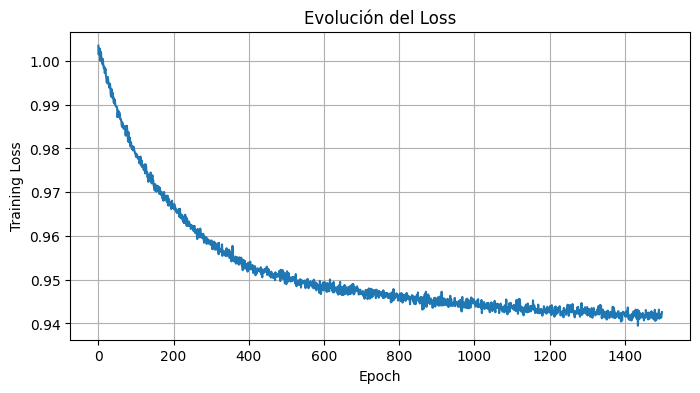

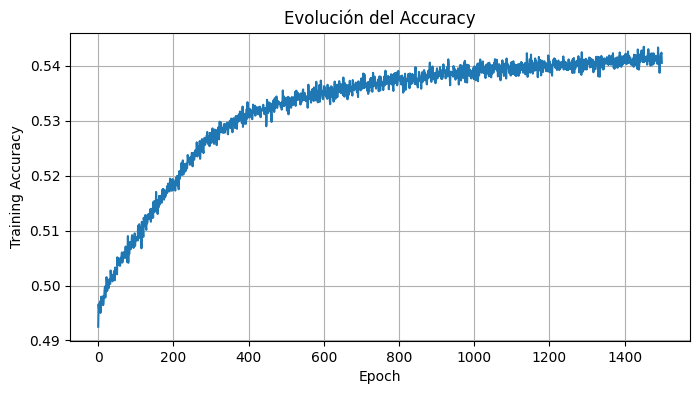

In [36]:
import matplotlib.pyplot as plt

# Plot de la pérdida
plt.figure(figsize=(8, 4))
plt.plot(list_loss)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Evolución del Loss")
plt.grid(True)
plt.show()

# Plot de la accuracy
plt.figure(figsize=(8, 4))
plt.plot(list_accu)
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")
plt.title("Evolución del Accuracy")
plt.grid(True)
plt.show()


# GraphSAGE + EdgesPlus.csv + FocalLoss + Betweenness Centrality (Este último es entero lento)

imports

In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch_geometric.data import Data
from torch_geometric.nn import SAGEConv
from torch_geometric.explain import Explainer, GNNExplainer

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import numpy as np
import random

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device


device(type='cuda')

Preparar tensores, crear risk_level y armar Data

In [54]:
import pandas as pd

# ============================
# 1. Features de nodo (nodes.csv)
# ============================
# Tus columnas reales:
# ['node', 'x_norm', 'y_norm', 'street_count']
node_feature_cols = ["x_norm", "y_norm", "street_count"]

# Mapeo id OSM → índice interno 0..N-1
unique_nodes = sorted(nodes["node"].unique())
node_id_to_idx = {nid: idx for idx, nid in enumerate(unique_nodes)}

nodes_sorted = nodes.set_index("node").loc[unique_nodes].reset_index()

x = torch.tensor(
    nodes_sorted[node_feature_cols].values,
    dtype=torch.float32
)

# ============================
# 2. Ordenar aristas y crear etiqueta de riesgo
# ============================
edges_sorted = edges.sort_values(by=["u", "v"]).reset_index(drop=True)

# Target original (accidentes)
target_cols = ["Fallecidos", "Graves", "Menos_Grav", "Leves", "Ilesos"]

# Severidad "proxy" (puedes ajustar pesos)
edges_sorted["severity_score"] = (
    3 * edges_sorted["Fallecidos"] +
    2 * edges_sorted["Graves"] +
    1 * edges_sorted["Menos_Grav"] +
    0.5 * edges_sorted["Leves"]
)

# Severidad por longitud de calle normalizada
edges_sorted["severity_per_length"] = edges_sorted["severity_score"] / (edges_sorted["Largo_calle_norm"] + 1e-6)

# Clases de riesgo (0: bajo, 1: medio, 2: alto) usando terciles
edges_sorted["risk_level"] = pd.qcut(
    edges_sorted["severity_per_length"].rank(method="first"),
    q=3,
    labels=[0, 1, 2]
).astype(int)

label_col = "risk_level"

# ============================
# 3. edge_index (u,v → índices internos)
# ============================
u_idx = edges_sorted["u"].map(node_id_to_idx).values
v_idx = edges_sorted["v"].map(node_id_to_idx).values

edge_index = torch.tensor(
    np.vstack([u_idx, v_idx]),
    dtype=torch.long
)


# ============================
# 4. Features de arista (edge_attr)
#    NO usamos las columnas del target para evitar leakage
# ============================

edge_feature_cols = [
    # tipo de calle
    "Tipo_calle_adoquin",
    "Tipo_calle_asfalto",
    "Tipo_calle_concreto",
    "Tipo_calle_mixto",
    # dirección y señalización
    #"direccion_calle",                                             # LO QUITAMOS CUANDO TRABAJAMOS CON EDGES_PLUS.CSV
    "Señal_ceda_el_paso",
    "Señal_pare",
    # info geométrica / funcional
    "Calle_recta",
    "Calle_prioridad_peatones",
    "Calle_principal",
    "Calle_residencial",
    "Calle_secundaria",
    "Calle_terciaria",
    # velocidades (one-hot)
    "vel_0", "vel_5", "vel_10", "vel_15", "vel_20",
    "vel_30", "vel_35", "vel_40", "vel_45", "vel_50",
    "vel_60", "vel_70", "vel_80", "vel_100", "vel_120",
    # largo normalizado
    "Largo_calle_norm",
]

edge_attr = torch.tensor(
    edges_sorted[edge_feature_cols].values,
    dtype=torch.float32
)

# ============================
# 5. Etiquetas por arista
# ============================

y_edge = torch.tensor(
    edges_sorted[label_col].values,
    dtype=torch.long
)

num_nodes = x.size(0)
num_edges = edge_index.size(1)
num_node_features = x.size(1)
num_edge_features = edge_attr.size(1)
num_classes = int(y_edge.max().item() + 1)

print(f"# nodos: {num_nodes}")
print(f"# aristas: {num_edges}")
print(f"# features nodo: {num_node_features}")
print(f"# features arista: {num_edge_features}")
print(f"# clases: {num_classes}")

# ============================
# 6. Split train/val/test a nivel arista
# ============================

def train_val_test_split(num_items, train_ratio=0.7, val_ratio=0.15, seed=42):
    random.seed(seed)
    idx = list(range(num_items))
    random.shuffle(idx)

    n_train = int(train_ratio * num_items)
    n_val = int(val_ratio * num_items)
    n_test = num_items - n_train - n_val

    train_idx = idx[:n_train]
    val_idx = idx[n_train:n_train+n_val]
    test_idx = idx[n_train+n_val:]

    mask_train = torch.zeros(num_items, dtype=torch.bool)
    mask_val = torch.zeros(num_items, dtype=torch.bool)
    mask_test = torch.zeros(num_items, dtype=torch.bool)

    mask_train[train_idx] = True
    mask_val[val_idx] = True
    mask_test[test_idx] = True

    return mask_train, mask_val, mask_test

train_mask, val_mask, test_mask = train_val_test_split(num_edges)

# ============================
# 7. Crear objeto Data de PyG y pasar a device
# ============================

data = Data(
    x=x,
    edge_index=edge_index,
    edge_attr=edge_attr
)

data.y_edge = y_edge
data.train_mask = train_mask
data.val_mask = val_mask
data.test_mask = test_mask

data = data.to(device)

num_node_features = data.x.size(1)
num_edge_features = data.edge_attr.size(1)

data


KeyboardInterrupt: 

Modelo GraphSAGE para clasificación de aristas

In [48]:
class StreetSafetyModel(nn.Module):
    """
    GraphSAGE sobre nodos + MLP sobre aristas.
    Predice clase de riesgo por arista.
    """
    def __init__(
        self,
        node_in_dim,
        edge_in_dim,
        hidden_dim,
        num_classes,
        num_layers=2,
        dropout=0.3
    ):
        super().__init__()

        self.num_layers = num_layers
        self.dropout = dropout

        # --- GraphSAGE en nodos ---
        self.convs = nn.ModuleList()
        self.convs.append(SAGEConv(node_in_dim, hidden_dim))
        for _ in range(num_layers - 1):
            self.convs.append(SAGEConv(hidden_dim, hidden_dim))

        # --- MLP en aristas ---
        edge_input_dim = 2 * hidden_dim + edge_in_dim

        self.mlp = nn.Sequential(
            nn.Linear(edge_input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, num_classes)
        )

    def forward(self, x, edge_index, edge_attr):
        # 1) Embeddings de nodos
        h = x
        for conv in self.convs:
            h = conv(h, edge_index)
            h = F.relu(h)
            h = F.dropout(h, p=self.dropout, training=self.training)

        # 2) Representación de aristas
        src, dst = edge_index  # [num_edges]
        h_src = h[src]
        h_dst = h[dst]

        edge_rep = torch.cat([h_src, h_dst, edge_attr], dim=1)

        # 3) Logits por arista
        out = self.mlp(edge_rep)
        return out  # [num_edges, num_classes]


Instanciar modelo, optimizador y loss

In [49]:
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        CE_loss = F.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-CE_loss)
        F_loss = self.alpha * (1-pt)**self.gamma * CE_loss

        if self.reduction == 'mean':
            return torch.mean(F_loss)
        return torch.sum(F_loss)



hidden_dim = 64
num_layers = 2
dropout = 0.3
learning_rate = 1e-3
weight_decay = 1e-4

model = StreetSafetyModel(
    node_in_dim=num_node_features,
    edge_in_dim=num_edge_features,
    hidden_dim=hidden_dim,
    num_classes=num_classes,
    num_layers=num_layers,
    dropout=dropout
).to(device)

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=learning_rate,
    weight_decay=weight_decay
)


# AQUI HICIMOS EL CAMBIO DE LA FUNCIÓN DE PERDIDA
criterion = FocalLoss(gamma=2.0)
model


StreetSafetyModel(
  (convs): ModuleList(
    (0): SAGEConv(3, 64, aggr=mean)
    (1): SAGEConv(64, 64, aggr=mean)
  )
  (mlp): Sequential(
    (0): Linear(in_features=156, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=64, out_features=3, bias=True)
  )
)

Funciones de entrenamiento y validación

In [50]:
def train_one_epoch(data, model, optimizer, criterion):
    model.train()
    optimizer.zero_grad()

    logits = model(data.x, data.edge_index, data.edge_attr)  # [E, C]
    loss = criterion(
        logits[data.train_mask],
        data.y_edge[data.train_mask]
    )

    loss.backward()
    optimizer.step()

    with torch.no_grad():
        preds = logits.argmax(dim=1)
        train_acc = accuracy_score(
            data.y_edge[data.train_mask].cpu(),
            preds[data.train_mask].cpu()
        )

    return loss.item(), train_acc


@torch.no_grad()
def evaluate(data, model, criterion, split="val"):
    model.eval()
    logits = model(data.x, data.edge_index, data.edge_attr)
    y_true = data.y_edge

    if split == "val":
        mask = data.val_mask
    elif split == "test":
        mask = data.test_mask
    elif split == "train":
        mask = data.train_mask
    else:
        raise ValueError("split debe ser 'train', 'val' o 'test'.")

    loss = criterion(
        logits[mask],
        y_true[mask]
    ).item()

    preds = logits.argmax(dim=1)

    acc = accuracy_score(
        y_true[mask].cpu(),
        preds[mask].cpu()
    )
    f1_macro = f1_score(
        y_true[mask].cpu(),
        preds[mask].cpu(),
        average="macro"
    )

    return loss, acc, f1_macro


Entrenamiento del modelo

In [51]:
num_epochs = 1500

best_val_f1 = 0.0
best_state_dict = None
list_losses = []
list_accs = []
for epoch in range(1, num_epochs + 1):
    train_loss, train_acc = train_one_epoch(data, model, optimizer, criterion)
    val_loss, val_acc, val_f1 = evaluate(data, model, criterion, split="val")

    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        best_state_dict = {k: v.cpu().clone() for k, v in model.state_dict().items()}

    if epoch % 5 == 0 or epoch == 1:
        print(
            f"Epoch {epoch:03d} | "
            f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.3f} | "
            f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.3f} | Val F1: {val_f1:.3f}"
        )
    list_losses.append(train_loss)
    list_accs.append(train_acc)

if best_state_dict is not None:
    model.load_state_dict(best_state_dict)
    model.to(device)
    print(f"\nMejor F1 de validación: {best_val_f1:.4f}")


Epoch 001 | Train Loss: 0.5087 | Train Acc: 0.331 | Val Loss: 0.4910 | Val Acc: 0.338 | Val F1: 0.254
Epoch 005 | Train Loss: 0.4944 | Train Acc: 0.337 | Val Loss: 0.4880 | Val Acc: 0.358 | Val F1: 0.256
Epoch 010 | Train Loss: 0.4880 | Train Acc: 0.353 | Val Loss: 0.4861 | Val Acc: 0.359 | Val F1: 0.263
Epoch 015 | Train Loss: 0.4851 | Train Acc: 0.371 | Val Loss: 0.4840 | Val Acc: 0.411 | Val F1: 0.371
Epoch 020 | Train Loss: 0.4820 | Train Acc: 0.384 | Val Loss: 0.4792 | Val Acc: 0.422 | Val F1: 0.385
Epoch 025 | Train Loss: 0.4782 | Train Acc: 0.397 | Val Loss: 0.4737 | Val Acc: 0.429 | Val F1: 0.396
Epoch 030 | Train Loss: 0.4749 | Train Acc: 0.403 | Val Loss: 0.4699 | Val Acc: 0.429 | Val F1: 0.397
Epoch 035 | Train Loss: 0.4716 | Train Acc: 0.411 | Val Loss: 0.4671 | Val Acc: 0.434 | Val F1: 0.404
Epoch 040 | Train Loss: 0.4686 | Train Acc: 0.421 | Val Loss: 0.4648 | Val Acc: 0.436 | Val F1: 0.408
Epoch 045 | Train Loss: 0.4661 | Train Acc: 0.427 | Val Loss: 0.4628 | Val Acc: 0.

Evaluación final en test

In [ ]:
@torch.no_grad()
def evaluate_full_metrics(data, model, split="test"):
    model.eval()
    logits = model(data.x, data.edge_index, data.edge_attr)
    y_true = data.y_edge

    if split == "val":
        mask = data.val_mask
    elif split == "test":
        mask = data.test_mask
    elif split == "train":
        mask = data.train_mask
    else:
        raise ValueError("split debe ser 'train', 'val' o 'test'.")

    y_true_split = y_true[mask].cpu()
    y_pred_split = logits[mask].argmax(dim=1).cpu()

    acc = accuracy_score(y_true_split, y_pred_split)
    f1_macro = f1_score(y_true_split, y_pred_split, average="macro")
    f1_weighted = f1_score(y_true_split, y_pred_split, average="weighted")
    cm = confusion_matrix(y_true_split, y_pred_split)

    print(f"{split.upper()} accuracy:  {acc:.4f}")
    print(f"{split.upper()} F1 macro: {f1_macro:.4f}")
    print(f"{split.upper()} F1 weighted: {f1_weighted:.4f}")
    print("\nReporte de clasificación:")
    print(classification_report(y_true_split, y_pred_split))
    print("Matriz de confusión:")
    print(cm)

    return {
        "acc": acc,
        "f1_macro": f1_macro,
        "f1_weighted": f1_weighted,
        "cm": cm
    }

test_metrics = evaluate_full_metrics(data, model, split="test")


TEST accuracy:  0.6149
TEST F1 macro: 0.6092
TEST F1 weighted: 0.6091

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.64      0.77      0.70     10335
           1       0.58      0.59      0.59     10221
           2       0.62      0.48      0.54     10434

    accuracy                           0.61     30990
   macro avg       0.61      0.62      0.61     30990
weighted avg       0.61      0.61      0.61     30990

Matriz de confusión:
[[8002 1310 1023]
 [2103 6063 2055]
 [2431 3013 4990]]


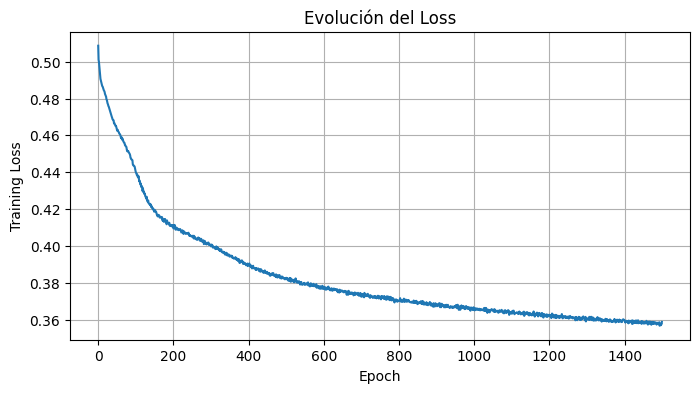

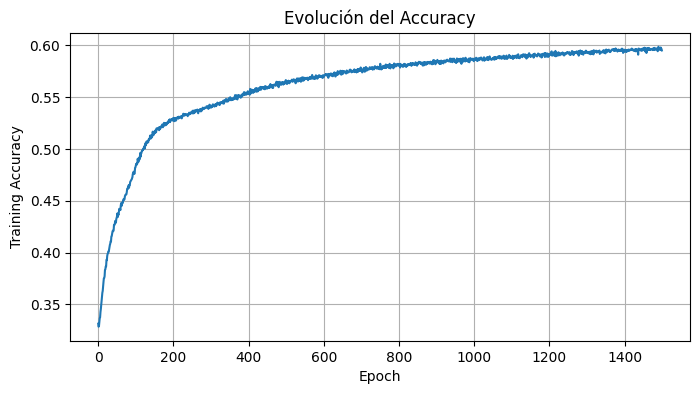

In [52]:
import matplotlib.pyplot as plt

# Plot de la pérdida
plt.figure(figsize=(8, 4))
plt.plot(list_losses)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Evolución del Loss")
plt.grid(True)
plt.show()

# Plot de la accuracy
plt.figure(figsize=(8, 4))
plt.plot(list_accs)
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")
plt.title("Evolución del Accuracy")
plt.grid(True)
plt.show()


GNNExplainer para explicar una arista

In [ ]:
from torch_geometric.explain import Explainer, GNNExplainer

# Configuramos el explainer para un modelo de clasificación multiclase a nivel de arista
explainer = Explainer(
    model=model,
    algorithm=GNNExplainer(epochs=200),
    explanation_type="model",
    node_mask_type="attributes",
    edge_mask_type="object",
    model_config=dict(
        mode="multiclass_classification",
        task_level="edge",
        return_type="raw",   # nuestro modelo entrega logits (no softmax)
    ),
)

# Elegimos una arista del split de test para explicar
edge_id = int(torch.nonzero(data.test_mask)[0].item())
print("Explicando arista (edge_id):", edge_id)

# edge_index y edge_attr van como keyword arguments
explanation = explainer(
    data.x,
    edge_index=data.edge_index,
    edge_attr=data.edge_attr,
    index=edge_id,
)

# Máscaras de importancia
edge_mask = explanation.edge_mask      # importancia por arista
node_mask = explanation.node_mask      # importancia de features de nodo

print("Dim edge_mask:", edge_mask.shape)
print("Dim node_mask:", node_mask.shape)

explanation.visualize_graph()


Explicando arista (edge_id): 4
Dim edge_mask: torch.Size([104489])
Dim node_mask: torch.Size([102568, 3])


# GraphSage + edges_plus_vs.csv + No considerar largo calle

In [6]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip install pyg-lib torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.4.0+cu121.html


Looking in indexes: https://download.pytorch.org/whl/cu121
Looking in links: https://data.pyg.org/whl/torch-2.4.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.6 MB/s eta 0:00:00


In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch_geometric.data import Data
from torch_geometric.nn import SAGEConv
from torch_geometric.explain import Explainer, GNNExplainer

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import numpy as np
import random

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device


/usr/local/lib/python3.12/dist-packages/torch_geometric/__init__.py:4: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: Could not load this library: /usr/local/lib/python3.12/dist-packages/libpyg.so
  import torch_geometric.typing
/usr/local/lib/python3.12/dist-packages/torch_geometric/__init__.py:4: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: Could not load this library: /usr/local/lib/python3.12/dist-packages/torch_scatter/_version_cuda.so
  import torch_geometric.typing
/usr/local/lib/python3.12/dist-packages/torch_geometric/__init__.py:4: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: Could not load this library: /usr/local/lib/python3.12/dist-packages/torch_sparse/_version_cuda.so
  import torch_geometric.typing


device(type='cuda')

In [26]:
import pandas as pd

# ============================
# 1. Features de nodo (nodes.csv)
# ============================
# Tus columnas reales:
# ['node', 'x_norm', 'y_norm', 'street_count']
node_feature_cols = ["x_norm", "y_norm", "street_count"]

# Mapeo id OSM → índice interno 0..N-1
unique_nodes = sorted(nodes["node"].unique())
node_id_to_idx = {nid: idx for idx, nid in enumerate(unique_nodes)}

nodes_sorted = nodes.set_index("node").loc[unique_nodes].reset_index()

x = torch.tensor(
    nodes_sorted[node_feature_cols].values,
    dtype=torch.float32
)

# ============================
# 2. Ordenar aristas y crear etiqueta de riesgo
# ============================
edges_sorted = edges.sort_values(by=["u", "v"]).reset_index(drop=True)

# Target original (accidentes)
target_cols = ["Fallecidos", "Graves", "Menos_Grav", "Leves", "Ilesos"]

# Severidad "proxy" (puedes ajustar pesos)
edges_sorted["severity_score"] = (
    10 * edges_sorted["Fallecidos"] +
    5 * edges_sorted["Graves"] +
    1 * edges_sorted["Menos_Grav"] +
    0.5 * edges_sorted["Leves"]
)
                                                                        #  YA NO CONSIDERAMOS LA ESCALA DEL RIESGO NORMALIZADA POR EL LARGO DE LA CALLE
# Clases de riesgo (0: bajo, 1: medio, 2: alto) usando terciles
edges_sorted["risk_level"] = pd.qcut(
    edges_sorted["severity_score"].rank(method="first"),
    q=3,
    labels=[0, 1, 2]
).astype(int)

label_col = "risk_level"

# ============================
# 3. edge_index (u,v → índices internos)
# ============================
u_idx = edges_sorted["u"].map(node_id_to_idx).values
v_idx = edges_sorted["v"].map(node_id_to_idx).values

edge_index = torch.tensor(
    np.vstack([u_idx, v_idx]),
    dtype=torch.long
)

# ============================
# 4. Features de arista (edge_attr)
#    NO usamos las columnas del target para evitar leakage
# ============================

edge_feature_cols = [
    # tipo de calle
    #"Tipo_calle_adoquin",
    #"Tipo_calle_asfalto",
    #"Tipo_calle_concreto",
    #"Tipo_calle_mixto",
    # dirección y señalización
    #"direccion_calle",                                             # LO QUITAMOS CUANDO TRABAJAMOS CON EDGES_PLUS.CSV
    "Señal_ceda_el_paso",
    "Señal_pare",
    # info geométrica / funcional
    "Calle_recta",
    "Calle_prioridad_peatones",
    "Calle_principal",
    "Calle_residencial",
    "Calle_secundaria",
    "Calle_terciaria",
    # velocidades (one-hot)
    "vel_max",
    # largo normalizado
    #"Largo_calle_norm"
]

edge_attr = torch.tensor(
    edges_sorted[edge_feature_cols].values,
    dtype=torch.float32
)

# ============================
# 5. Etiquetas por arista
# ============================

y_edge = torch.tensor(
    edges_sorted[label_col].values,
    dtype=torch.long
)

num_nodes = x.size(0)
num_edges = edge_index.size(1)
num_node_features = x.size(1)
num_edge_features = edge_attr.size(1)
num_classes = int(y_edge.max().item() + 1)

print(f"# nodos: {num_nodes}")
print(f"# aristas: {num_edges}")
print(f"# features nodo: {num_node_features}")
print(f"# features arista: {num_edge_features}")
print(f"# clases: {num_classes}")

# ============================
# 6. Split train/val/test a nivel arista
# ============================

def train_val_test_split(num_items, train_ratio=0.7, val_ratio=0.15, seed=42):
    random.seed(seed)
    idx = list(range(num_items))
    random.shuffle(idx)

    n_train = int(train_ratio * num_items)
    n_val = int(val_ratio * num_items)
    n_test = num_items - n_train - n_val

    train_idx = idx[:n_train]
    val_idx = idx[n_train:n_train+n_val]
    test_idx = idx[n_train+n_val:]

    mask_train = torch.zeros(num_items, dtype=torch.bool)
    mask_val = torch.zeros(num_items, dtype=torch.bool)
    mask_test = torch.zeros(num_items, dtype=torch.bool)

    mask_train[train_idx] = True
    mask_val[val_idx] = True
    mask_test[test_idx] = True

    return mask_train, mask_val, mask_test

train_mask, val_mask, test_mask = train_val_test_split(num_edges)

# ============================
# 7. Crear objeto Data de PyG y pasar a device
# ============================

data = Data(
    x=x,
    edge_index=edge_index,
    edge_attr=edge_attr
)

data.y_edge = y_edge
data.train_mask = train_mask
data.val_mask = val_mask
data.test_mask = test_mask

data = data.to(device)

num_node_features = data.x.size(1)
num_edge_features = data.edge_attr.size(1)

data


# nodos: 102568
# aristas: 206594
# features nodo: 3
# features arista: 9
# clases: 3


Data(x=[102568, 3], edge_index=[2, 206594], edge_attr=[206594, 9], y_edge=[206594], train_mask=[206594], val_mask=[206594], test_mask=[206594])

In [32]:
class StreetSafetyModel(nn.Module):
    """
    GraphSAGE sobre nodos + MLP sobre aristas.
    Predice clase de riesgo por arista.
    """
    def __init__(
        self,
        node_in_dim,
        edge_in_dim,
        hidden_dim,
        num_classes,
        num_layers=2,
        dropout=0.3
    ):
        super().__init__()

        self.num_layers = num_layers
        self.dropout = dropout

        # --- GraphSAGE en nodos ---
        self.convs = nn.ModuleList()
        self.convs.append(SAGEConv(node_in_dim, hidden_dim))
        for _ in range(num_layers - 1):
            self.convs.append(SAGEConv(hidden_dim, hidden_dim))

        # --- MLP en aristas ---
        edge_input_dim = 2 * hidden_dim + edge_in_dim

        self.mlp = nn.Sequential(
            nn.Linear(edge_input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, num_classes)
        )

    def forward(self, x, edge_index, edge_attr):
        # 1) Embeddings de nodos
        h = x
        for conv in self.convs:
            h = conv(h, edge_index)
            h = F.relu(h)
            h = F.dropout(h, p=self.dropout, training=self.training)

        # 2) Representación de aristas
        src, dst = edge_index  # [num_edges]
        h_src = h[src]
        h_dst = h[dst]

        edge_rep = torch.cat([h_src, h_dst, edge_attr], dim=1)

        # 3) Logits por arista
        out = self.mlp(edge_rep)
        return out  # [num_edges, num_classes]


In [33]:
hidden_dim = 64
num_layers = 2
dropout = 0.3
learning_rate = 1e-3
weight_decay = 1e-4

model = StreetSafetyModel(
    node_in_dim=num_node_features,
    edge_in_dim=num_edge_features,
    hidden_dim=hidden_dim,
    num_classes=num_classes,
    num_layers=num_layers,
    dropout=dropout
).to(device)

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=learning_rate,
    weight_decay=weight_decay
)

criterion = nn.CrossEntropyLoss()

model


StreetSafetyModel(
  (convs): ModuleList(
    (0): SAGEConv(3, 64, aggr=mean)
    (1): SAGEConv(64, 64, aggr=mean)
  )
  (mlp): Sequential(
    (0): Linear(in_features=137, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=64, out_features=3, bias=True)
  )
)

In [34]:
def train_one_epoch(data, model, optimizer, criterion):
    model.train()
    optimizer.zero_grad()

    logits = model(data.x, data.edge_index, data.edge_attr)  # [E, C]
    loss = criterion(
        logits[data.train_mask],
        data.y_edge[data.train_mask]
    )

    loss.backward()
    optimizer.step()

    with torch.no_grad():
        preds = logits.argmax(dim=1)
        train_acc = accuracy_score(
            data.y_edge[data.train_mask].cpu(),
            preds[data.train_mask].cpu()
        )

    return loss.item(), train_acc


@torch.no_grad()
def evaluate(data, model, criterion, split="val"):
    model.eval()
    logits = model(data.x, data.edge_index, data.edge_attr)
    y_true = data.y_edge

    if split == "val":
        mask = data.val_mask
    elif split == "test":
        mask = data.test_mask
    elif split == "train":
        mask = data.train_mask
    else:
        raise ValueError("split debe ser 'train', 'val' o 'test'.")

    loss = criterion(
        logits[mask],
        y_true[mask]
    ).item()

    preds = logits.argmax(dim=1)

    acc = accuracy_score(
        y_true[mask].cpu(),
        preds[mask].cpu()
    )
    f1_macro = f1_score(
        y_true[mask].cpu(),
        preds[mask].cpu(),
        average="macro"
    )

    return loss, acc, f1_macro


In [35]:
num_epochs = 2500

best_val_f1 = 0.0
best_state_dict = None
list_losses = []
list_accs = []
for epoch in range(1, num_epochs + 1):
    train_loss, train_acc = train_one_epoch(data, model, optimizer, criterion)
    val_loss, val_acc, val_f1 = evaluate(data, model, criterion, split="val")

    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        best_state_dict = {k: v.cpu().clone() for k, v in model.state_dict().items()}

    if epoch % 5 == 0 or epoch == 1:
        print(
            f"Epoch {epoch:03d} | "
            f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.3f} | "
            f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.3f} | Val F1: {val_f1:.3f}"
        )
    list_losses.append(val_loss)
    list_accs.append(val_acc)

if best_state_dict is not None:
    model.load_state_dict(best_state_dict)
    model.to(device)
    print(f"\nMejor F1 de validación: {best_val_f1:.4f}")


Epoch 001 | Train Loss: 1.2959 | Train Acc: 0.340 | Val Loss: 1.1326 | Val Acc: 0.338 | Val F1: 0.185
Epoch 005 | Train Loss: 1.2070 | Train Acc: 0.341 | Val Loss: 1.0986 | Val Acc: 0.359 | Val F1: 0.225
Epoch 010 | Train Loss: 1.1635 | Train Acc: 0.346 | Val Loss: 1.0923 | Val Acc: 0.392 | Val F1: 0.304
Epoch 015 | Train Loss: 1.1432 | Train Acc: 0.349 | Val Loss: 1.0936 | Val Acc: 0.360 | Val F1: 0.229
Epoch 020 | Train Loss: 1.1214 | Train Acc: 0.352 | Val Loss: 1.0852 | Val Acc: 0.402 | Val F1: 0.372
Epoch 025 | Train Loss: 1.1067 | Train Acc: 0.361 | Val Loss: 1.0830 | Val Acc: 0.388 | Val F1: 0.326
Epoch 030 | Train Loss: 1.0967 | Train Acc: 0.369 | Val Loss: 1.0797 | Val Acc: 0.402 | Val F1: 0.334
Epoch 035 | Train Loss: 1.0912 | Train Acc: 0.376 | Val Loss: 1.0769 | Val Acc: 0.438 | Val F1: 0.375
Epoch 040 | Train Loss: 1.0874 | Train Acc: 0.379 | Val Loss: 1.0747 | Val Acc: 0.440 | Val F1: 0.399
Epoch 045 | Train Loss: 1.0845 | Train Acc: 0.384 | Val Loss: 1.0719 | Val Acc: 0.

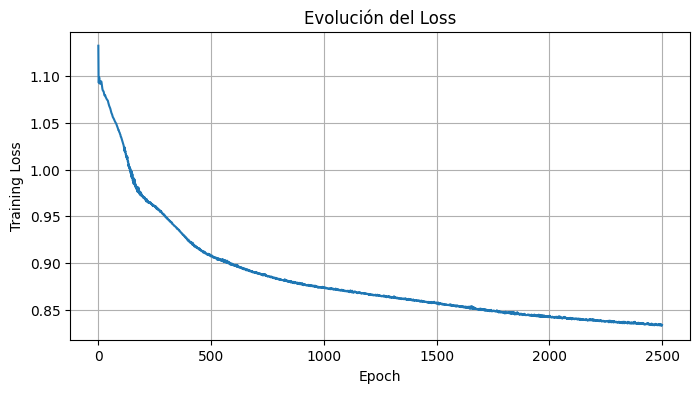

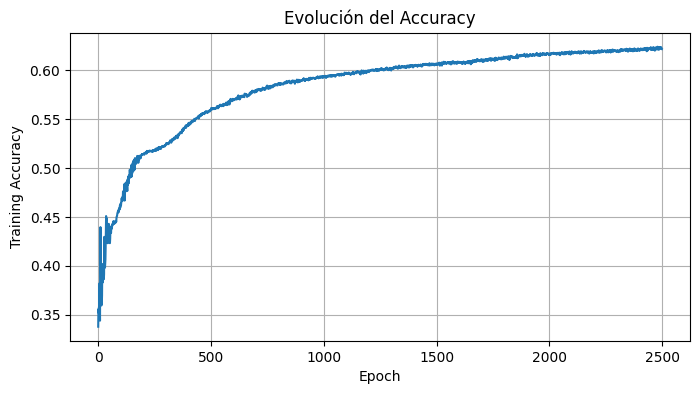

In [36]:
import matplotlib.pyplot as plt

# Plot de la pérdida
plt.figure(figsize=(8, 4))
plt.plot(list_losses)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Evolución del Loss")
plt.grid(True)
plt.show()

# Plot de la accuracy
plt.figure(figsize=(8, 4))
plt.plot(list_accs)
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")
plt.title("Evolución del Accuracy")
plt.grid(True)
plt.show()


In [37]:
@torch.no_grad()
def evaluate_full_metrics(data, model, split="test"):
    model.eval()
    logits = model(data.x, data.edge_index, data.edge_attr)
    y_true = data.y_edge

    if split == "val":
        mask = data.val_mask
    elif split == "test":
        mask = data.test_mask
    elif split == "train":
        mask = data.train_mask
    else:
        raise ValueError("split debe ser 'train', 'val' o 'test'.")

    y_true_split = y_true[mask].cpu()
    y_pred_split = logits[mask].argmax(dim=1).cpu()

    acc = accuracy_score(y_true_split, y_pred_split)
    f1_macro = f1_score(y_true_split, y_pred_split, average="macro")
    f1_weighted = f1_score(y_true_split, y_pred_split, average="weighted")
    cm = confusion_matrix(y_true_split, y_pred_split)

    print(f"{split.upper()} accuracy:  {acc:.4f}")
    print(f"{split.upper()} F1 macro: {f1_macro:.4f}")
    print(f"{split.upper()} F1 weighted: {f1_weighted:.4f}")
    print("\nReporte de clasificación:")
    print(classification_report(y_true_split, y_pred_split))
    print("Matriz de confusión:")
    print(cm)

    return {
        "acc": acc,
        "f1_macro": f1_macro,
        "f1_weighted": f1_weighted,
        "cm": cm
    }

test_metrics = evaluate_full_metrics(data, model, split="test")


TEST accuracy:  0.6177
TEST F1 macro: 0.6115
TEST F1 weighted: 0.6113

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.64      0.78      0.70     10335
           1       0.60      0.60      0.60     10221
           2       0.62      0.47      0.54     10434

    accuracy                           0.62     30990
   macro avg       0.62      0.62      0.61     30990
weighted avg       0.62      0.62      0.61     30990

Matriz de confusión:
[[8098 1216 1021]
 [2065 6094 2062]
 [2576 2906 4952]]


# Ploteamos la predicción

In [41]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np

# 1. Obtener predicciones del modelo
model.eval()
with torch.no_grad():
    logits = model(data.x, data.edge_index, data.edge_attr)
    predictions = logits.argmax(dim=1).cpu().numpy()

# 2. Agregarlas a tu dataframe de aristas
edges_viz = edges_sorted.copy()
edges_viz['prediction'] = predictions

# 3. Mapear coordenadas a las aristas
# Necesitamos saber las coordenadas (x, y) de 'u' y de 'v' para dibujar la línea
# Usamos nodes_sorted que ya está indexado por tu índice interno 0..N
node_coords = nodes_sorted[['x_norm', 'y_norm']].values

# Creamos una lista de segmentos [(x1, y1), (x2, y2)] para cada calle
segments = []
colors = []

# Definir colores: 0 (Seguro) -> Verde, 1 (Peligroso) -> Rojo
# Si tienes 3 clases: 0->Verde, 1->Amarillo, 2->Rojo
cmap_colors = ['#2ecc71', '#e74c3c'] if num_classes == 2 else ['#2ecc71', '#f1c40f', '#e74c3c']

print("Preparando geometría para plotear...")

# Iteramos (esto es rápido con map, pero lo haremos explícito para entenderlo)
# Mapeamos los IDs de nodos originales a índices internos si es necesario,
# pero como 'u_idx' y 'v_idx' ya los calculaste antes, usémoslos si los guardaste.
# Si no, usamos el map:
u_coords = node_coords[edges_viz['u'].map(node_id_to_idx).values]
v_coords = node_coords[edges_viz['v'].map(node_id_to_idx).values]

# Crear array de segmentos: [num_edges, 2_puntos, 2_coords]
# Forma: (N, 2, 2)
segments = np.stack((u_coords, v_coords), axis=1)

# Asignar colores según la predicción
edge_colors = [cmap_colors[pred] for pred in edges_viz['prediction']]

Preparando geometría para plotear...


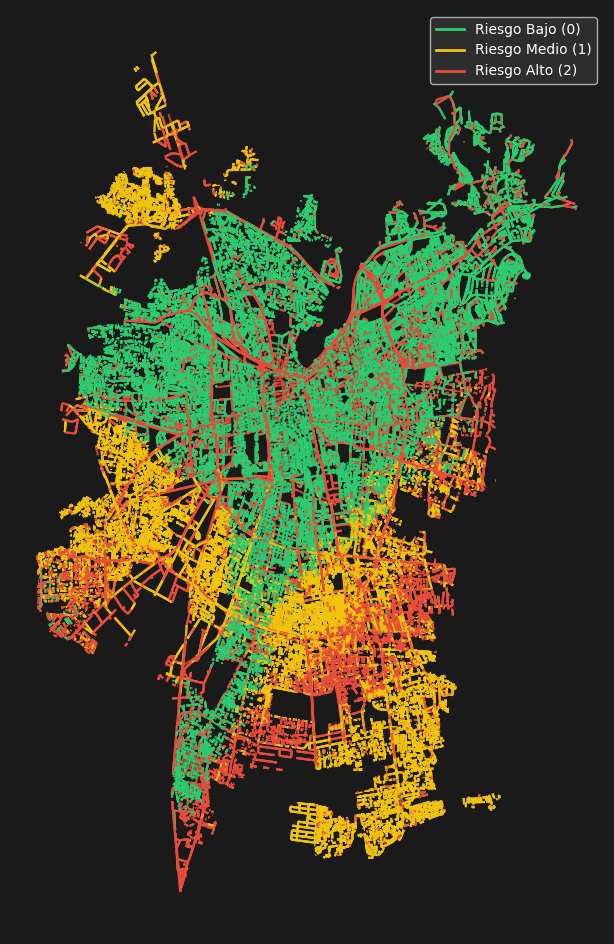

In [42]:
# 4. Plotear
fig, ax = plt.subplots(figsize=(12, 12))

# Fondo oscuro para que resalten las calles (estilo "Matrix" o GPS nocturno)
ax.set_facecolor('#1a1a1a')
fig.patch.set_facecolor('#1a1a1a')

# Crear la colección de líneas
lc = LineCollection(segments, colors=edge_colors, linewidths=1.5, alpha=0.8)
ax.add_collection(lc)

# Ajustar límites del plot
ax.autoscale()
ax.set_aspect('equal') # Importante para que el mapa no se vea estirado
ax.axis('off') # Quitar ejes X e Y

from matplotlib.lines import Line2D

# Definir elementos de la leyenda dinámicamente según tus clases
if num_classes == 3:
    legend_elements = [
        Line2D([0], [0], color=cmap_colors[0], lw=2, label='Riesgo Bajo (0)'),     # Verde
        Line2D([0], [0], color=cmap_colors[1], lw=2, label='Riesgo Medio (1)'),    # Amarillo
        Line2D([0], [0], color=cmap_colors[2], lw=2, label='Riesgo Alto (2)')      # Rojo
    ]
else:
    # Caso binario (si cambiaste a 2 clases como sugerimos antes)
    legend_elements = [
        Line2D([0], [0], color=cmap_colors[0], lw=2, label='Seguro (0)'),          # Verde
        Line2D([0], [0], color=cmap_colors[-1], lw=2, label='Peligroso (1)')       # Rojo
    ]

# Volver a plotear la leyenda
ax.legend(handles=legend_elements, loc='upper right', facecolor='#333333', labelcolor='white')

# (Si necesitas redibujar el plot completo, vuelve a ejecutar la celda anterior con este cambio)
plt.draw()
plt.show()



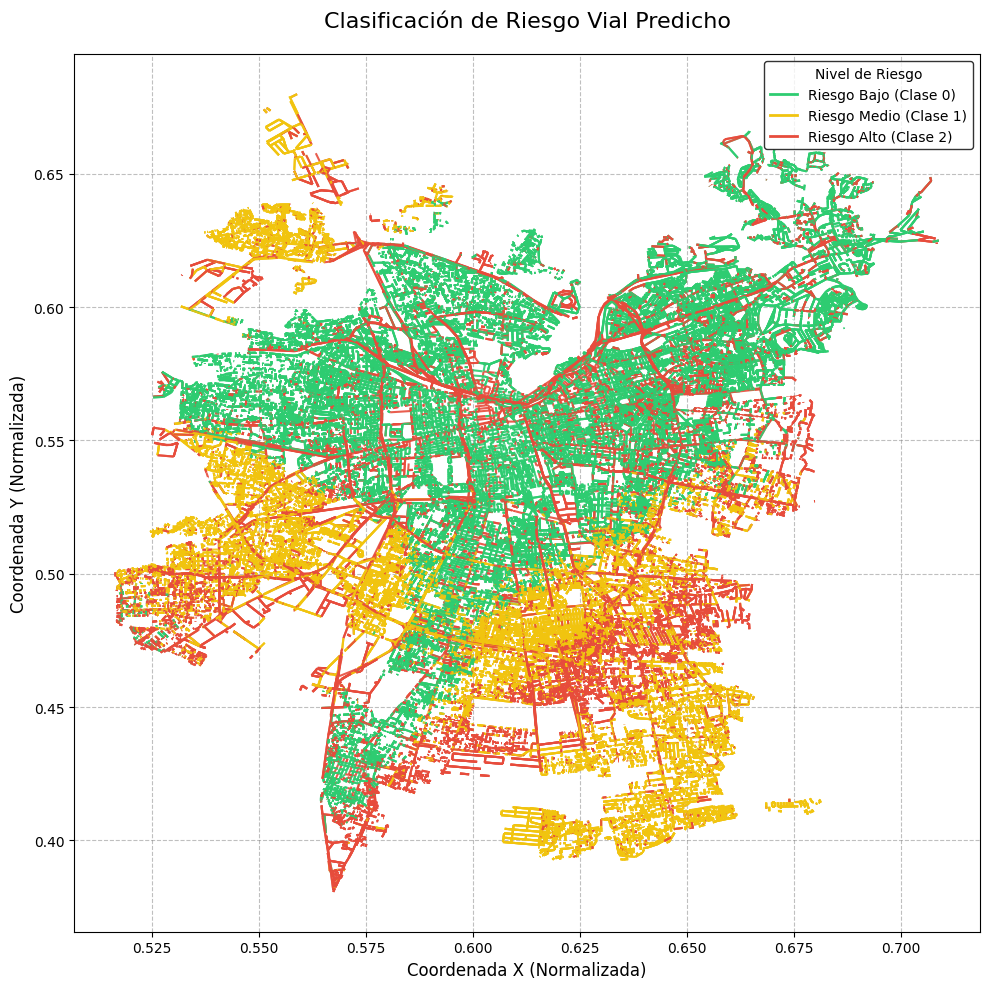

In [47]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.lines import Line2D
import numpy as np
import torch

# ==========================================
# 1. Preparar las Predicciones
# ==========================================
model.eval()
with torch.no_grad():
    # Obtenemos los logits y la clase ganadora (0, 1 o 2)
    logits = model(data.x, data.edge_index, data.edge_attr)
    predictions = logits.argmax(dim=1).cpu().numpy()

# Copiamos para no dañar el original
edges_viz = edges_sorted.copy()
edges_viz['prediction'] = predictions

# ==========================================
# 2. Preparar la Geometría (Segmentos)
# ==========================================
# Coordenadas de todos los nodos (array Nx2)
node_coords = nodes_sorted[['x_norm', 'y_norm']].values

# Mapeamos los índices de los nodos a sus coordenadas
# Usamos map(node_id_to_idx) para asegurar que el ID de OSM coincida con el índice del tensor
u_indices = edges_viz['u'].map(node_id_to_idx).values
v_indices = edges_viz['v'].map(node_id_to_idx).values

u_coords = node_coords[u_indices]
v_coords = node_coords[v_indices]

# Creamos la estructura de segmentos para LineCollection: (Num_Edges, 2, 2)
segments = np.stack((u_coords, v_coords), axis=1)

# ==========================================
# 3. Configurar Colores (Verde, Amarillo, Rojo)
# ==========================================
# 0: Bajo (Verde), 1: Medio (Amarillo), 2: Alto (Rojo)
# Puedes ajustar los códigos HEX a tu gusto
cmap_colors = ['#2ecc71', '#f1c40f', '#e74c3c']

# Asignar un color a cada arista según su predicción
edge_colors = [cmap_colors[pred] for pred in edges_viz['prediction']]

# ==========================================
# 4. Plotear (Estilo Blanco / Académico)
# ==========================================
fig, ax = plt.subplots(figsize=(10, 10))

# Configuración de fondo blanco (estándar)
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Crear la colección de líneas
lc = LineCollection(
    segments,
    colors=edge_colors,
    linewidths=1.5,
    alpha=0.9  # Un poco de transparencia por si se solapan
)
ax.add_collection(lc)

# Ajustes de Ejes y Títulos
ax.autoscale()
#ax.set_aspect('equal') # CRITICO: Para que el mapa no se vea estirado
ax.set_xlabel("Coordenada X (Normalizada)", fontsize=12)
ax.set_ylabel("Coordenada Y (Normalizada)", fontsize=12)
ax.set_title("Clasificación de Riesgo Vial Predicho", fontsize=16, pad=20)

# Activar la grilla suave (opcional, ayuda a leer coordenadas)
ax.grid(True, linestyle='--', alpha=0.5, color='gray')

# ==========================================
# 5. Leyenda Personalizada
# ==========================================
legend_elements = [
    Line2D([0], [0], color=cmap_colors[0], lw=2, label='Riesgo Bajo (Clase 0)'),
    Line2D([0], [0], color=cmap_colors[1], lw=2, label='Riesgo Medio (Clase 1)'),
    Line2D([0], [0], color=cmap_colors[2], lw=2, label='Riesgo Alto (Clase 2)')
]

# Ubicar la leyenda donde no estorbe (ej. mejor esquina)
ax.legend(
    handles=legend_elements,
    loc='best',
    title="Nivel de Riesgo",
    fontsize=10,
    frameon=True,         # Recuadro alrededor de la leyenda
    facecolor='white',    # Fondo blanco para la leyenda
    edgecolor='black'     # Borde negro para la leyenda
)

plt.tight_layout()
plt.show()

# Hacemos el entrenmaiento ahora con GAT

In [57]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch_geometric.data import Data
from torch_geometric.nn import SAGEConv
from torch_geometric.explain import Explainer, GNNExplainer

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import numpy as np
import random

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device


device(type='cuda')

In [58]:
import pandas as pd

# ============================
# 1. Features de nodo (nodes.csv)
# ============================
# Tus columnas reales:
# ['node', 'x_norm', 'y_norm', 'street_count']
node_feature_cols = ["x_norm", "y_norm", "street_count"]

# Mapeo id OSM → índice interno 0..N-1
unique_nodes = sorted(nodes["node"].unique())
node_id_to_idx = {nid: idx for idx, nid in enumerate(unique_nodes)}

nodes_sorted = nodes.set_index("node").loc[unique_nodes].reset_index()

x = torch.tensor(
    nodes_sorted[node_feature_cols].values,
    dtype=torch.float32
)

# ============================
# 2. Ordenar aristas y crear etiqueta de riesgo
# ============================
edges_sorted = edges.sort_values(by=["u", "v"]).reset_index(drop=True)

# Target original (accidentes)
target_cols = ["Fallecidos", "Graves", "Menos_Grav", "Leves", "Ilesos"]

# Severidad "proxy" (puedes ajustar pesos)
edges_sorted["severity_score"] = (
    10 * edges_sorted["Fallecidos"] +
    5 * edges_sorted["Graves"] +
    1 * edges_sorted["Menos_Grav"] +
    0.5 * edges_sorted["Leves"]
)
                                                                        #  YA NO CONSIDERAMOS LA ESCALA DEL RIESGO NORMALIZADA POR EL LARGO DE LA CALLE
# Clases de riesgo (0: bajo, 1: medio, 2: alto) usando terciles
edges_sorted["risk_level"] = pd.qcut(
    edges_sorted["severity_score"].rank(method="first"),
    q=3,
    labels=[0, 1, 2]
).astype(int)

label_col = "risk_level"

# ============================
# 3. edge_index (u,v → índices internos)
# ============================
u_idx = edges_sorted["u"].map(node_id_to_idx).values
v_idx = edges_sorted["v"].map(node_id_to_idx).values

edge_index = torch.tensor(
    np.vstack([u_idx, v_idx]),
    dtype=torch.long
)

# ============================
# 4. Features de arista (edge_attr)
#    NO usamos las columnas del target para evitar leakage
# ============================

edge_feature_cols = [
    # tipo de calle
    #"Tipo_calle_adoquin",
    #"Tipo_calle_asfalto",
    #"Tipo_calle_concreto",
    #"Tipo_calle_mixto",
    # dirección y señalización
    #"direccion_calle",                                             # LO QUITAMOS CUANDO TRABAJAMOS CON EDGES_PLUS.CSV
    "Señal_ceda_el_paso",
    "Señal_pare",
    # info geométrica / funcional
    "Calle_recta",
    "Calle_prioridad_peatones",
    "Calle_principal",
    "Calle_residencial",
    "Calle_secundaria",
    "Calle_terciaria",
    # velocidades (one-hot)
    "vel_max",
    # largo normalizado
    #"Largo_calle_norm"
]

edge_attr = torch.tensor(
    edges_sorted[edge_feature_cols].values,
    dtype=torch.float32
)

# ============================
# 5. Etiquetas por arista
# ============================

y_edge = torch.tensor(
    edges_sorted[label_col].values,
    dtype=torch.long
)

num_nodes = x.size(0)
num_edges = edge_index.size(1)
num_node_features = x.size(1)
num_edge_features = edge_attr.size(1)
num_classes = int(y_edge.max().item() + 1)

print(f"# nodos: {num_nodes}")
print(f"# aristas: {num_edges}")
print(f"# features nodo: {num_node_features}")
print(f"# features arista: {num_edge_features}")
print(f"# clases: {num_classes}")

# ============================
# 6. Split train/val/test a nivel arista
# ============================

def train_val_test_split(num_items, train_ratio=0.7, val_ratio=0.15, seed=42):
    random.seed(seed)
    idx = list(range(num_items))
    random.shuffle(idx)

    n_train = int(train_ratio * num_items)
    n_val = int(val_ratio * num_items)
    n_test = num_items - n_train - n_val

    train_idx = idx[:n_train]
    val_idx = idx[n_train:n_train+n_val]
    test_idx = idx[n_train+n_val:]

    mask_train = torch.zeros(num_items, dtype=torch.bool)
    mask_val = torch.zeros(num_items, dtype=torch.bool)
    mask_test = torch.zeros(num_items, dtype=torch.bool)

    mask_train[train_idx] = True
    mask_val[val_idx] = True
    mask_test[test_idx] = True

    return mask_train, mask_val, mask_test

train_mask, val_mask, test_mask = train_val_test_split(num_edges)

# ============================
# 7. Crear objeto Data de PyG y pasar a device
# ============================

data = Data(
    x=x,
    edge_index=edge_index,
    edge_attr=edge_attr
)

data.y_edge = y_edge
data.train_mask = train_mask
data.val_mask = val_mask
data.test_mask = test_mask

data = data.to(device)

num_node_features = data.x.size(1)
num_edge_features = data.edge_attr.size(1)

data


# nodos: 102568
# aristas: 206594
# features nodo: 3
# features arista: 9
# clases: 3


Data(x=[102568, 3], edge_index=[2, 206594], edge_attr=[206594, 9], y_edge=[206594], train_mask=[206594], val_mask=[206594], test_mask=[206594])

In [59]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv, Linear

class StreetSafetyModelGAT(nn.Module):
    """
    GAT (con features de arista integrados) sobre nodos + MLP sobre aristas.
    Predice clase de riesgo por arista.
    """
    def __init__(
        self,
        node_in_dim,
        edge_in_dim,
        hidden_dim,
        num_classes,
        num_layers=2,
        dropout=0.3,
        heads=4  # Nuevo: Número de cabezas de atención
    ):
        super().__init__()

        self.num_layers = num_layers
        self.dropout = dropout

        self.convs = nn.ModuleList()

        # --- Capa 1: GAT ---
        # concat=True: la salida será hidden_dim * heads
        # IMPORTANTE: edge_dim permite que GAT use tus features de calle para calcular la atención
        self.convs.append(
            GATConv(node_in_dim, hidden_dim, heads=heads, dropout=dropout, edge_dim=edge_in_dim, concat=True)
        )

        # --- Capas intermedias (si usas más de 2 capas) ---
        # La entrada es (hidden_dim * heads) de la capa anterior
        for _ in range(num_layers - 2):
             self.convs.append(
                GATConv(hidden_dim * heads, hidden_dim, heads=heads, dropout=dropout, edge_dim=edge_in_dim, concat=True)
            )

        # --- Capa final de nodos ---
        # concat=False: promediamos las cabezas para volver a tener un embedding de tamaño 'hidden_dim'
        self.convs.append(
            GATConv(hidden_dim * heads, hidden_dim, heads=1, dropout=dropout, edge_dim=edge_in_dim, concat=False)
        )

        # --- MLP en aristas (Igual que antes) ---
        # Toma embedding del nodo U + embedding nodo V + features originales de la arista
        edge_input_dim = 2 * hidden_dim + edge_in_dim

        self.mlp = nn.Sequential(
            nn.Linear(edge_input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, num_classes)
        )

    def forward(self, x, edge_index, edge_attr):
        # 1) Embeddings de nodos con Atención
        h = x
        for i, conv in enumerate(self.convs):
            # ¡Aquí está la magia! Pasamos edge_attr a la convolución
            h = conv(h, edge_index, edge_attr=edge_attr)

            # Usualmente GAT usa ELU en lugar de ReLU entre capas
            if i < len(self.convs) - 1:
                h = F.elu(h)
                h = F.dropout(h, p=self.dropout, training=self.training)

        # 2) Representación de aristas para el clasificador final
        src, dst = edge_index  # [num_edges]
        h_src = h[src]
        h_dst = h[dst]

        # Concatenamos: [Embedding Nodo Origen, Embedding Nodo Destino, Features Arista Originales]
        edge_rep = torch.cat([h_src, h_dst, edge_attr], dim=1)

        # 3) Logits por arista
        out = self.mlp(edge_rep)
        return out  # [num_edges, num_classes]

In [60]:
# ============================
# Hiperparámetros ajustados para GAT
# ============================
# GAT se beneficia de embeddings un poco más grandes y multiple heads
hidden_dim = 128   # Aumentado de 64 a 128
heads = 4          # Estándar para empezar
num_layers = 2     # Mantenemos 2 capas (1 de entrada con 4 cabezas -> 1 de salida que promedia)
dropout = 0.4      # Un poco más de dropout para evitar overfitting con GAT
learning_rate = 0.0005 # Un poco más bajo para estabilidad al inicio
weight_decay = 5e-4    # Un poco más de regularización

# Limpiar memoria de GPU por si acaso
torch.cuda.empty_cache()
model = None

model = StreetSafetyModelGAT(
    node_in_dim=num_node_features,
    edge_in_dim=num_edge_features,
    hidden_dim=hidden_dim,
    num_classes=num_classes,
    num_layers=num_layers,
    dropout=dropout,
    heads=heads
).to(device)

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=learning_rate,
    weight_decay=weight_decay
)

# Opcional: Usar Class Weights si tus clases 0, 1, 2 siguen desbalanceadas
# class_weights = torch.tensor([1.0, 1.5, 2.0]).to(device)
# criterion = nn.CrossEntropyLoss(weight=class_weights)
criterion = nn.CrossEntropyLoss()

print(model)
# Ahora ejecuta tus celdas de entrenamiento (train_one_epoch y el bucle principal) exactamente igual que antes.

StreetSafetyModelGAT(
  (convs): ModuleList(
    (0): GATConv(3, 128, heads=4)
    (1): GATConv(512, 128, heads=1)
  )
  (mlp): Sequential(
    (0): Linear(in_features=265, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=128, out_features=3, bias=True)
  )
)


In [61]:
def train_one_epoch(data, model, optimizer, criterion):
    model.train()
    optimizer.zero_grad()

    logits = model(data.x, data.edge_index, data.edge_attr)  # [E, C]
    loss = criterion(
        logits[data.train_mask],
        data.y_edge[data.train_mask]
    )

    loss.backward()
    optimizer.step()

    with torch.no_grad():
        preds = logits.argmax(dim=1)
        train_acc = accuracy_score(
            data.y_edge[data.train_mask].cpu(),
            preds[data.train_mask].cpu()
        )

    return loss.item(), train_acc


@torch.no_grad()
def evaluate(data, model, criterion, split="val"):
    model.eval()
    logits = model(data.x, data.edge_index, data.edge_attr)
    y_true = data.y_edge

    if split == "val":
        mask = data.val_mask
    elif split == "test":
        mask = data.test_mask
    elif split == "train":
        mask = data.train_mask
    else:
        raise ValueError("split debe ser 'train', 'val' o 'test'.")

    loss = criterion(
        logits[mask],
        y_true[mask]
    ).item()

    preds = logits.argmax(dim=1)

    acc = accuracy_score(
        y_true[mask].cpu(),
        preds[mask].cpu()
    )
    f1_macro = f1_score(
        y_true[mask].cpu(),
        preds[mask].cpu(),
        average="macro"
    )

    return loss, acc, f1_macro


In [62]:
num_epochs = 2000

best_val_f1 = 0.0
best_state_dict = None
list_loss = []
list_accu = []
for epoch in range(1, num_epochs + 1):
    train_loss, train_acc = train_one_epoch(data, model, optimizer, criterion)
    val_loss, val_acc, val_f1 = evaluate(data, model, criterion, split="val")

    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        best_state_dict = {k: v.cpu().clone() for k, v in model.state_dict().items()}

    if epoch % 5 == 0 or epoch == 1:
        print(
            f"Epoch {epoch:03d} | "
            f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.3f} | "
            f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.3f} | Val F1: {val_f1:.3f}"
        )
    list_loss.append(val_loss)
    list_accu.append(val_acc)

if best_state_dict is not None:
    model.load_state_dict(best_state_dict)
    model.to(device)
    print(f"\nMejor F1 de validación: {best_val_f1:.4f}")


Epoch 001 | Train Loss: 1.2468 | Train Acc: 0.333 | Val Loss: 1.1014 | Val Acc: 0.320 | Val F1: 0.300
Epoch 005 | Train Loss: 1.2054 | Train Acc: 0.334 | Val Loss: 1.0973 | Val Acc: 0.332 | Val F1: 0.174
Epoch 010 | Train Loss: 1.1666 | Train Acc: 0.338 | Val Loss: 1.0930 | Val Acc: 0.342 | Val F1: 0.203
Epoch 015 | Train Loss: 1.1301 | Train Acc: 0.343 | Val Loss: 1.0911 | Val Acc: 0.397 | Val F1: 0.296
Epoch 020 | Train Loss: 1.1067 | Train Acc: 0.346 | Val Loss: 1.0905 | Val Acc: 0.414 | Val F1: 0.391
Epoch 025 | Train Loss: 1.0973 | Train Acc: 0.365 | Val Loss: 1.0887 | Val Acc: 0.398 | Val F1: 0.298
Epoch 030 | Train Loss: 1.0933 | Train Acc: 0.372 | Val Loss: 1.0883 | Val Acc: 0.395 | Val F1: 0.314
Epoch 035 | Train Loss: 1.0922 | Train Acc: 0.377 | Val Loss: 1.0887 | Val Acc: 0.397 | Val F1: 0.304
Epoch 040 | Train Loss: 1.0903 | Train Acc: 0.381 | Val Loss: 1.0868 | Val Acc: 0.424 | Val F1: 0.397
Epoch 045 | Train Loss: 1.0895 | Train Acc: 0.384 | Val Loss: 1.0857 | Val Acc: 0.

In [63]:
@torch.no_grad()
def evaluate_full_metrics(data, model, split="test"):
    model.eval()
    logits = model(data.x, data.edge_index, data.edge_attr)
    y_true = data.y_edge

    if split == "val":
        mask = data.val_mask
    elif split == "test":
        mask = data.test_mask
    elif split == "train":
        mask = data.train_mask
    else:
        raise ValueError("split debe ser 'train', 'val' o 'test'.")

    y_true_split = y_true[mask].cpu()
    y_pred_split = logits[mask].argmax(dim=1).cpu()

    acc = accuracy_score(y_true_split, y_pred_split)
    f1_macro = f1_score(y_true_split, y_pred_split, average="macro")
    f1_weighted = f1_score(y_true_split, y_pred_split, average="weighted")
    cm = confusion_matrix(y_true_split, y_pred_split)

    print(f"{split.upper()} accuracy:  {acc:.4f}")
    print(f"{split.upper()} F1 macro: {f1_macro:.4f}")
    print(f"{split.upper()} F1 weighted: {f1_weighted:.4f}")
    print("\nReporte de clasificación:")
    print(classification_report(y_true_split, y_pred_split))
    print("Matriz de confusión:")
    print(cm)

    return {
        "acc": acc,
        "f1_macro": f1_macro,
        "f1_weighted": f1_weighted,
        "cm": cm
    }

test_metrics = evaluate_full_metrics(data, model, split="test")


TEST accuracy:  0.5367
TEST F1 macro: 0.5240
TEST F1 weighted: 0.5240

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.52      0.78      0.63     10335
           1       0.53      0.43      0.48     10221
           2       0.57      0.40      0.47     10434

    accuracy                           0.54     30990
   macro avg       0.54      0.54      0.52     30990
weighted avg       0.54      0.54      0.52     30990

Matriz de confusión:
[[8061 1161 1113]
 [3764 4409 2048]
 [3593 2680 4161]]


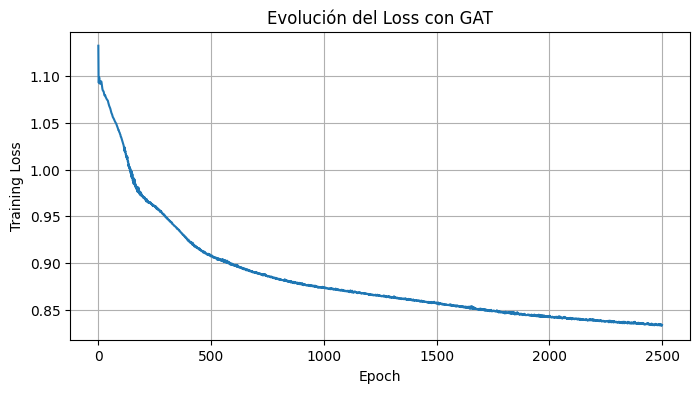

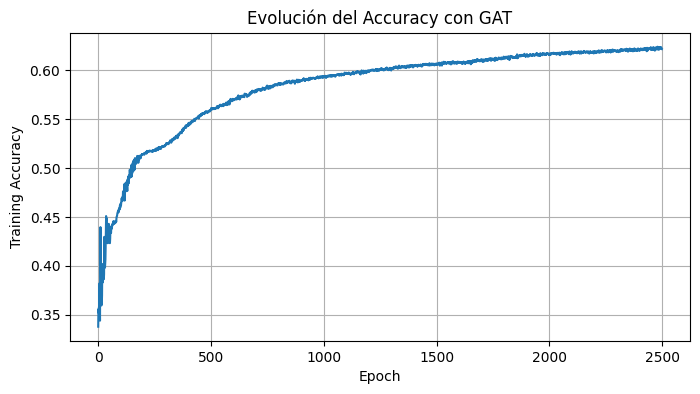

In [64]:
import matplotlib.pyplot as plt

# Plot de la pérdida
plt.figure(figsize=(8, 4))
plt.plot(list_losses)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Evolución del Loss con GAT")
plt.grid(True)
plt.show()

# Plot de la accuracy
plt.figure(figsize=(8, 4))
plt.plot(list_accs)
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")
plt.title("Evolución del Accuracy con GAT")
plt.grid(True)
plt.show()
